## Проект: Обучение с учителем: качество модели.

### Описание проекта.

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты.<br/>
Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.<br/>
Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.<br/>
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.<br/>
У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе.<br/>
Отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br/>
<br/>
Продумывать подход к решению этой задачи нам не придётся — руководитель отдела его уже сформировал:
- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.<br/>
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.

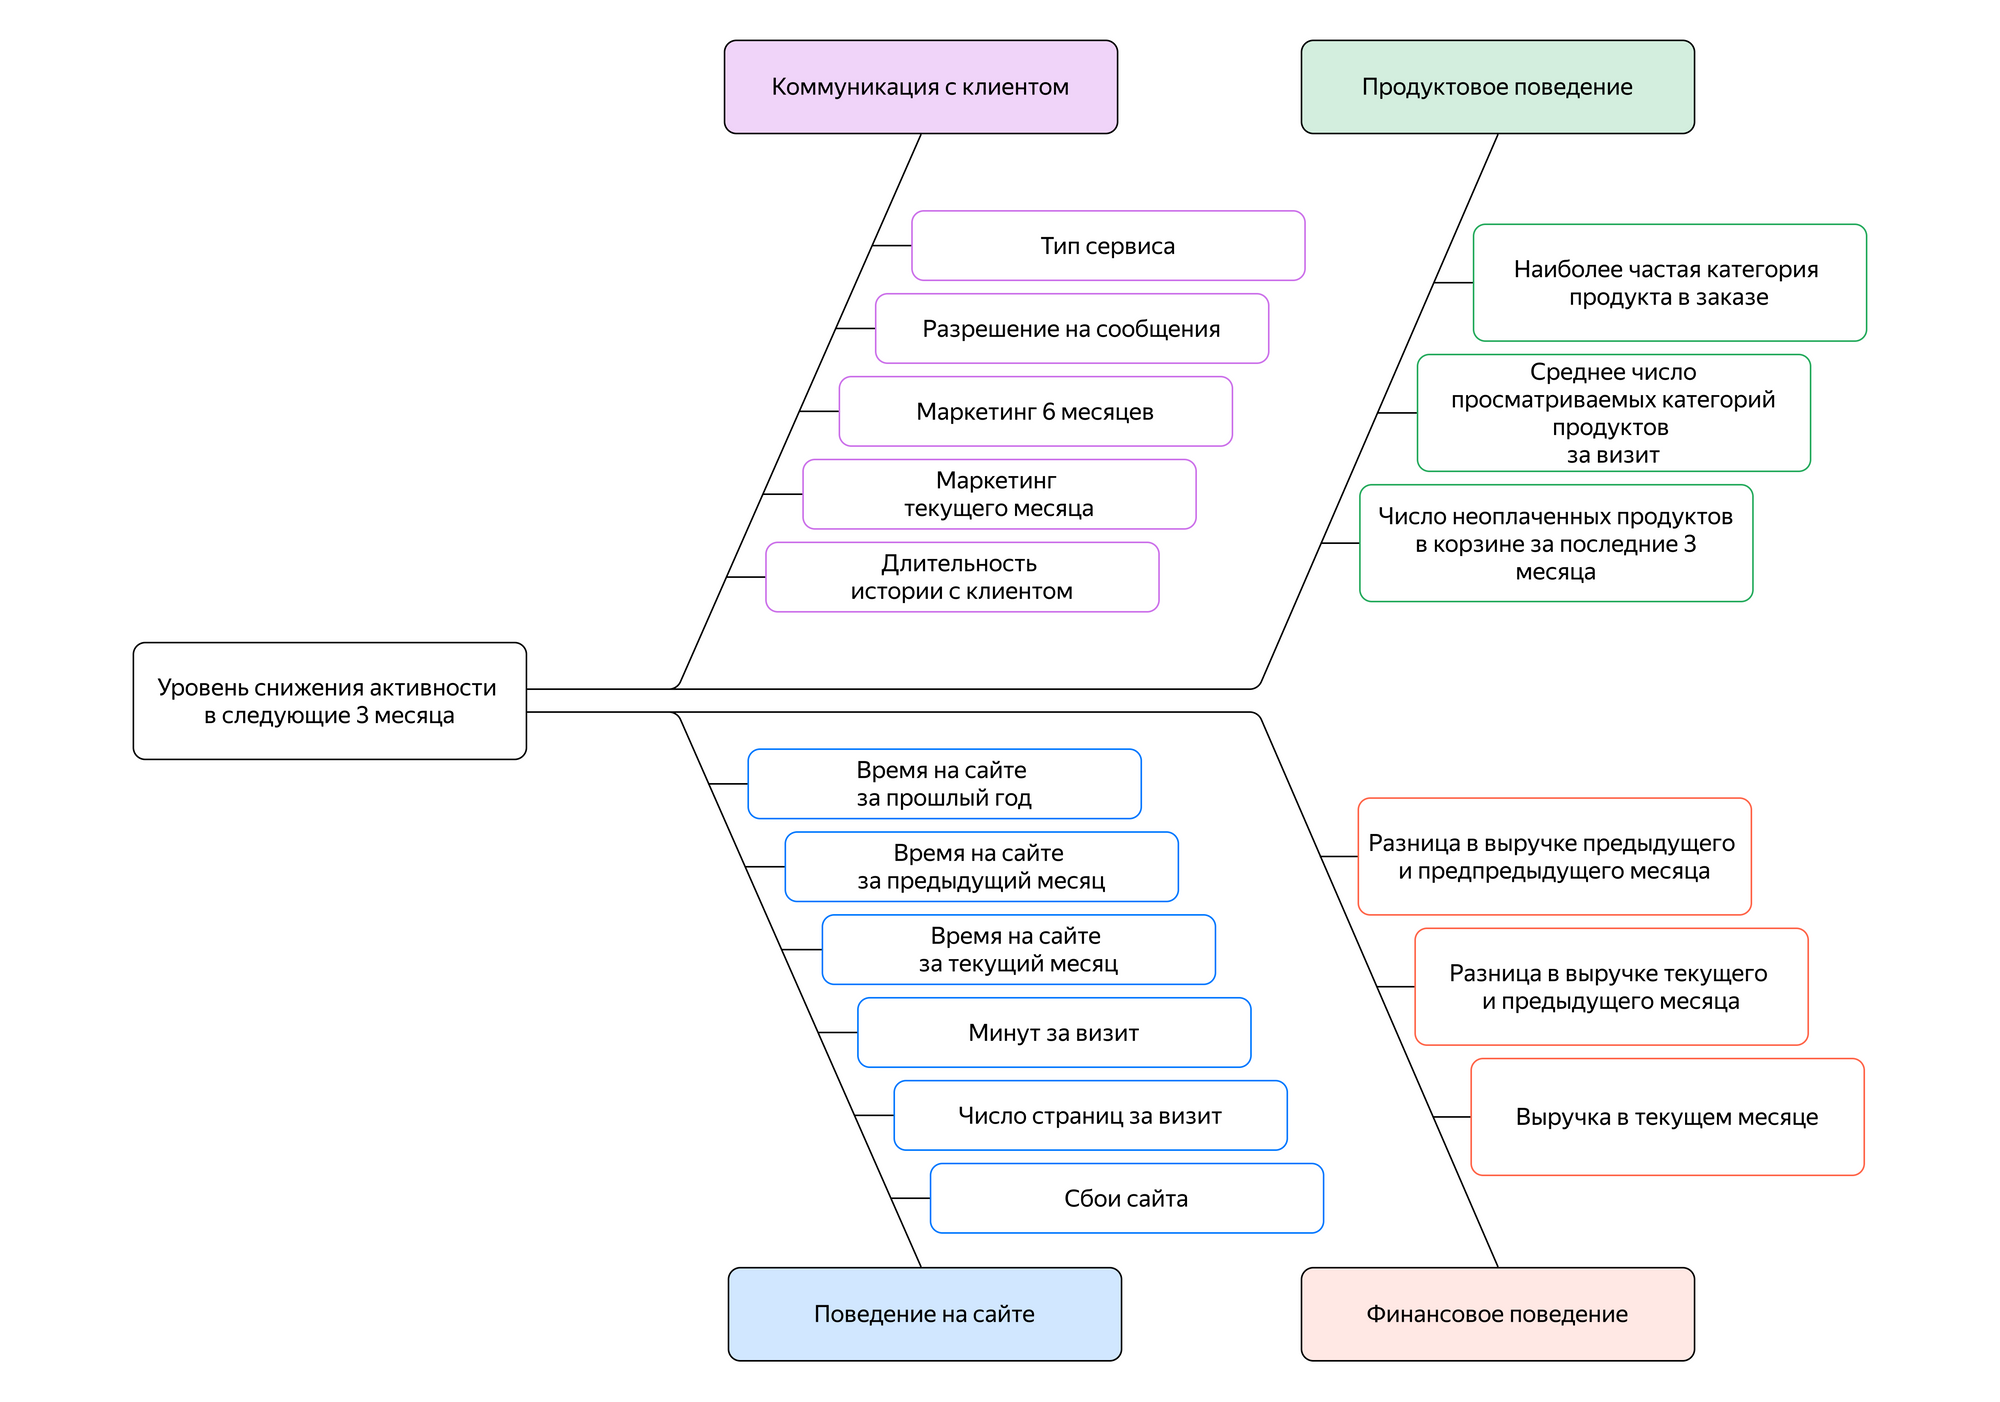

Решать задачу будем в два этапа:<br/>
- Разработаем модель, которая предскажет вероятность снижения покупательской активности.
- Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность. Используя данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию можем проанализировать больше одного сегмента.<br/>
	
Ниже несколько примеров сегментов, также можем выделить свой:
	
- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

### Описание данных.

Будем работать с четырьмя датасетами: данные о поведении покупателя на сайте, данные о выручке, данные о времени (в минутах), данные о среднемесячной прибыли продавца за последние 3 месяца.<br/><br/>
**Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.** — market_file.csv
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br/><br/>

**Данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.** — market_money.csv
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.<br/><br/>

**Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода** — market_time.csv
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.<br/><br/>

**Данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.** — money.csv
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.<br/>

### Предварительный план.

**Первичный план проекта обучение с учителем: качество модели.**

* 1. Считать CSV-файлы ( market_file.csv, market_money, market_time.csv, money.csv) с данными с помощью библиотеки pandas и сохраните их в датафреймы. Вывести несколько случайных строк каждого набора и изучить общую информацию о каждом датафрейме.
* 2. Выполнить предобработку данных. Привести столбцы к единому формату. Проверить наличие пропусков и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.
* 3. Провести исследовательский анализ данных. Отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага. Построить графики для каждого признака. Сделать выводы о данных, есть ли выбросы, необычное распределение количественных признаков или другие особенности.
* 4. Объединить таблицы. Учитывать, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице необходимо сделать отдельный столбец для каждого периода.
* 5. Провести корреляционный анализ признаков в датафрейме market. Сделать выводы о мультиколлинеарности и при необходимости устранить её.
* 6. Использование пайплайнов. Во время подготовки данных использовать ColumnTransformer. Обучить четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подобрать как минимум один гиперпараметр. Выбрать подходящую для задачи метрику, аргументировать свой выбор. Использовать эту метрику при подборе гиперпараметров. Выбрать лучшую модель, используя заданную метрику.
* 7. Оценить важность признаков для лучшей модели и построить график важности с помощью метода SHAP. Сделайть выводы о значимости признаков.
* 8. Выполнить сегментацию покупателей. Использовать результаты моделирования и данные о прибыльности покупателей. Выбрать группу покупателей и предложить, как увеличить её покупательскую активность. Сделайть выводы о сегментах.
* 9. Написать общий вывод.

**Базовая цель проекта.**

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br/>
Необходимо построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.<br/>
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.<br/>
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Загрузка данных

### Загрузка библиотек.

In [111]:
try:
    %pip install phik -q
    %pip install --upgrade scikit-learn==1.1.3 -q
    %pip install --upgrade seaborn -q
    %pip install --upgrade numba -q
    %pip install shap -q
except Exception as error:
    print(f'Ошибка загрузки: {error}')

try:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import shap
    from scipy import stats as st
    from phik import phik_matrix
    from phik.report import plot_correlation_matrix
    from sklearn.compose import ColumnTransformer
    from sklearn.dummy import DummyClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split, RandomizedSearchCV
    from sklearn.metrics import (
        roc_auc_score,
        recall_score,
        f1_score,
        make_scorer)
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import (
        OneHotEncoder,
        OrdinalEncoder,
        LabelEncoder,
        MinMaxScaler,
        StandardScaler)
except ImportError as error:
    print(f'Ошибка импорта: {error}')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Константы.

In [112]:
ZERO = 0
ONE = 1
TWO = 2
THREE = 3
SIX = 6
TEN = 10
ID = 'id'
RANDOM_STATE = 42
TEST_SIZE = 0.25
COLOR_ONE = 'SteelBlue'
COLOR_TWO = 'Yellow'
COLOR_THREE = 'Green'
COLOR_FOUR = 'Blues'
PATH_HOME = '/Users/andrey/Python_dev/Jupiter/_sprint_7/'
PATH_HUB = '/datasets/'

### Загрузка данных из csv-файлов в датафрейм.

In [113]:
try:
    market_file = pd.read_csv(f'{PATH_HOME}market_file.csv', sep=',', decimal='.')
    market_money = pd.read_csv(f'{PATH_HOME}market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv(f'{PATH_HOME}market_time.csv', sep=',', decimal='.')
    money = pd.read_csv(f'{PATH_HOME}money.csv', sep=';', decimal=',')
except FileNotFoundError:
    try:
        market_file = pd.read_csv(f'{PATH_HUB}market_file.csv', sep=',', decimal='.')
        market_money = pd.read_csv(f'{PATH_HUB}market_money.csv', sep=',', decimal='.')
        market_time = pd.read_csv(f'{PATH_HUB}market_time.csv', sep=',', decimal='.')
        money = pd.read_csv(f'{PATH_HUB}money.csv', sep=';', decimal=',')
    except Exception as error:
        print(f'Что то пошло не так: {error}')

### Дополнительные настройки.

In [114]:
# Отключаем предупреждения.
pd.options.mode.chained_assignment = None

# Задаем два знака после запятой для чисел с плавающей запятой.
pd.options.display.float_format = '{:,.2f}'.format

### Вспомогательные методы.

In [115]:
# Добавим датафреймы в словарик.
data_frames = {'market_file': market_file, 
               'market_money': market_money,
               'market_time': market_time,
               'money': money}

In [116]:
# Кастомный метод вывода информации о датафрейме.
def custom_info(value,
                dtype_recom=False,
                is_result=True,
                sample=False,
                sample_quantity=TEN,
                head_value=0):
    result = (
        pd.DataFrame(value.count(),
                     columns=['non_null_count']))
    result['dtype'] = (
        pd.DataFrame(value.dtypes, 
                     columns=['dtype']))

    if dtype_recom:
        result['dtype_recomended'] = (
            pd.DataFrame(
                value.convert_dtypes()
                .dtypes.to_frame()
                .rename(columns={0: 'dtype_recomended'}), 
                        columns=['dtype_recomended']))
    if is_result:
        display(result)
    print(f'Количество записей: {len(value)}')
    print(f'Количество столбцов: {len(value.columns)}')

    if sample:
        display(value.sample(sample_quantity).T)

    if head_value != 0:
        display(value.head(head_value).T)

In [117]:
# Проверка пустых значений в датафрейме.
def count_none_values_table(value, name=''):
    try:
        result = (
            (value.isna().sum())
            .to_frame()
            .rename(columns={0: 'count_none'})
            .query('count_none > 0'))
        if len(result) != 0:
            print(f'Пропущенные значения в датафрейме {name}.'.strip())
            display(result.sort_values(by='count_none', ascending=True))
        else:
            print(f'В датафрейме {name} нет пропущенных значений.'
                  .replace('  ', ' '))
    except Exception as error:
        print(f'Что пошло не так: {error}')

### Общая информация о полученных датафреймах.

Посмотрим на статистику по столбцам.<br/>
Выведем на экран по 10 случайных позиций данных из каждого датафрейма. Посмотрим на их состав.

In [118]:
print('Статистика по столбцам, данные о поведении покупателя на сайте, \
о коммуникациях с покупателем и его продуктовом поведении.')
custom_info(market_file, sample=True)

Статистика по столбцам, данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.


,non_null_count,dtype
id,1300,int64
Покупательская активность,1300,object
Тип сервиса,1300,object
Разрешить сообщать,1300,object
Маркет_актив_6_мес,1300,float64
Маркет_актив_тек_мес,1300,int64
Длительность,1300,int64
Акционные_покупки,1300,float64
Популярная_категория,1300,object
Средний_просмотр_категорий_за_визит,1300,int64


Количество записей: 1300
Количество столбцов: 13


,807,859,358,1219,288,395,1175,159,434,819
id,216155,216207,215706,216567,215636,215743,216523,215507,215782,216167
Покупательская активность,Прежний уровень,Прежний уровень,Снизилась,Прежний уровень,Снизилась,Снизилась,Прежний уровень,Снизилась,Прежний уровень,Прежний уровень
Тип сервиса,стандарт,стандарт,стандарт,стандарт,стандарт,премиум,стандарт,стандарт,стандарт,стандарт
Разрешить сообщать,да,да,да,да,да,да,да,да,да,нет
Маркет_актив_6_мес,5.50,4.10,3.50,4.20,3.50,4.10,4.00,3.80,5.20,4.40
Маркет_актив_тек_мес,5,4,5,4,5,4,3,3,3,5
Длительность,121,503,730,254,749,375,461,871,457,791
Акционные_покупки,0.16,0.25,0.94,0.25,0.30,0.32,0.28,0.32,0.17,0.24
Популярная_категория,Кухонная посуда,Техника для красоты и здоровья,Товары для детей,Товары для детей,Товары для детей,Косметика и аксесуары,Мелкая бытовая техника и электроника,Техника для красоты и здоровья,Товары для детей,Кухонная посуда
Средний_просмотр_категорий_за_визит,4,4,2,2,1,1,4,2,4,3


In [119]:
print('Статистика по столбцам, данные о выручке, \
которую получает магазин с покупателя, \
то есть сколько покупатель всего потратил за период взаимодействия с сайтом.')
custom_info(market_money, sample=True)

Статистика по столбцам, данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.


,non_null_count,dtype
id,3900,int64
Период,3900,object
Выручка,3900,float64


Количество записей: 3900
Количество столбцов: 3


,2628,2425,1500,639,720,3346,3695,1,2520,232
id,216224,216156,215848,215561,215588,216463,216579,215348,216188,215425
Период,текущий_месяц,предыдущий_месяц,предыдущий_месяц,предыдущий_месяц,предыдущий_месяц,предыдущий_месяц,предыдущий_месяц,текущий_месяц,препредыдущий_месяц,препредыдущий_месяц
Выручка,"4,152.20","3,364.00","5,496.50","5,900.50","4,776.00","5,180.00","4,490.50","3,293.10","5,428.00","4,623.00"


In [120]:
display(market_money[(market_money[ID] == 215635)].T)

,861,862,863
id,215635,215635,215635
Период,предыдущий_месяц,текущий_месяц,препредыдущий_месяц
Выручка,"5,167.00","5,772.80","4,900.00"


In [121]:
print('Статистика по столбцам, данные о времени (в минутах), \
которое покупатель провёл на сайте в течение периода.')
custom_info(market_time, sample=True)

Статистика по столбцам, данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.


,non_null_count,dtype
id,2600,int64
Период,2600,object
минут,2600,int64


Количество записей: 2600
Количество столбцов: 3


,328,1517,1538,1297,1802,1220,386,1667,709,1537
id,215512,216106,216117,215996,216249,215958,215541,216181,215702,216116
Период,текущий_месяц,предыдцщий_месяц,текущий_месяц,текущий_месяц,текущий_месяц,предыдцщий_месяц,текущий_месяц,текущий_месяц,текущий_месяц,предыдцщий_месяц
минут,8,14,9,22,16,17,9,16,7,15


In [122]:
display(market_time[market_time[ID] == 215947].T)

,1198,1199
id,215947,215947
Период,текущий_месяц,предыдцщий_месяц
минут,13,14


In [123]:
print('Статистика по столбцам, данные о среднемесячной прибыли продавца \
за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.')
custom_info(money, sample=True)

Статистика по столбцам, данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.


,non_null_count,dtype
id,1300,int64
Прибыль,1300,float64


Количество записей: 1300
Количество столбцов: 2


,1113,1261,1297,1201,715,688,1162,1048,538,779
id,"216,461.00","216,609.00","216,645.00","216,549.00","216,063.00","216,036.00","216,510.00","216,396.00","215,886.00","216,127.00"
Прибыль,3.91,4.18,3.29,5.44,2.54,5.03,3.76,2.15,4.26,3.71


**Вывод шаг №1**<br/>
По результату изучения общей информации о каждом датафрейме, наблюдаем следующую картину:
* Наборы данных далее датафреймы, описывают информацию о коммуникациях с покупателем и его продуктовом поведении; о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом; о времени (в минутах), которое покупатель провёл на сайте в течение периода и о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* В датафрейме market_file, market_money, market_time, money есть колонка id (уникальный идентификатор покупателя) по которому можно первый датафрейм обогатить . Если это потребуется в будущем.
* Типы данных у каждого признака соответствуют корректным значениям. 
* В датафреймах market_file, market_money, market_time, money отсутствуют пропущенные значения, количество ненулевых значений соотвествует количеству записей в датафреймах.
* Названия колонок в датафреймах следует привести к единому формату, в соответствии со «змеиным_регистром».
* При загрузке датафрейма money применен параметр **decimal=','**. Данный параметр помогает исправить процесс парсинга дробных чисел, pandas ожидает точку, а не запятую в качестве разделителя дробной части. В исходных данных была использована в качестве разделителя дробной части запятая вместо точки, было выявлено при исследовании первоначальной загрузки данных.

##  Предобработка данных

### Преобразуем названия колонок в датафреймах к единому формату, в соответствии со «змеиным_регистром».

In [124]:
print('Результирующая таблица по изменению названия столбцов в датафрейме market_file:')
result = pd.DataFrame(market_file.columns, columns=['columns_before'])

data = market_file.rename(columns=
                  {'Покупательская активность': 'Покупательская_активность',
                   'Тип сервиса': 'Тип_сервиса',
                   'Разрешить сообщать': 'Разрешить_сообщать'
                   }, inplace=True)

result['columns_after'] = pd.DataFrame(market_file.columns, columns=['columns_after'])
display(result)

Результирующая таблица по изменению названия столбцов в датафрейме market_file:


,columns_before,columns_after
0,id,id
1,Покупательская активность,Покупательская_активность
2,Тип сервиса,Тип_сервиса
3,Разрешить сообщать,Разрешить_сообщать
4,Маркет_актив_6_мес,Маркет_актив_6_мес
5,Маркет_актив_тек_мес,Маркет_актив_тек_мес
6,Длительность,Длительность
7,Акционные_покупки,Акционные_покупки
8,Популярная_категория,Популярная_категория
9,Средний_просмотр_категорий_за_визит,Средний_просмотр_категорий_за_визит


In [125]:
print('Результирующая таблица по изменению названия столбцов в датафрейме market_file:')
result = pd.DataFrame(market_time.columns, columns=['columns_before'])

data = market_time.rename(columns=
                  {'минут': 'Минуты'
                   }, inplace=True)

result['columns_after'] = pd.DataFrame(market_time.columns, columns=['columns_after'])
display(result)

Результирующая таблица по изменению названия столбцов в датафрейме market_file:


,columns_before,columns_after
0,id,id
1,Период,Период
2,минут,Минуты


### Проверим наличие пропусков в датафреймах.

In [126]:
for name, data in data_frames.items():
    count_none_values_table(data, name)

В датафрейме market_file нет пропущенных значений.
В датафрейме market_money нет пропущенных значений.
В датафрейме market_time нет пропущенных значений.
В датафрейме money нет пропущенных значений.


### Проверим данные на наличие дубликатов.

#### Исследование датафреймов на явное дублирование данных.

In [127]:
for name, data in data_frames.items():
    print(f'Количество явных дубликатов в датафрейме {name} - ', end='')
    print(data.duplicated().sum());

Количество явных дубликатов в датафрейме market_file - 0
Количество явных дубликатов в датафрейме market_money - 0
Количество явных дубликатов в датафрейме market_time - 0
Количество явных дубликатов в датафрейме money - 0


#### Исследование датафреймов на неявное дублирование данных.

In [128]:
# Создадим метод для проверки уникальных значений в текстовых столбцах.
def check_unique_value():
    for name, data in data_frames.items():
        # создаём список со строковыми категориями
        cols = data.select_dtypes(include='object').columns.tolist()
        if cols:
            print(f'\nУникальные значения текстовых полей в датафрейме {name}:')
            for value in cols:
                print(f'{value:16} - {data[value].unique()}')
            print(f'Размер датафрейма - {data.shape}')

In [129]:
# Обновим датафреймы в словаре.
data_frames = {'market_file': market_file, 
               'market_money': market_money,
               'market_time': market_time,
               'money': money}

# Проверим уникальные значения в текстовых столбцах.
check_unique_value()


Уникальные значения текстовых полей в датафрейме market_file:
Покупательская_активность - ['Снизилась' 'Прежний уровень']
Тип_сервиса      - ['премиум' 'стандартт' 'стандарт']
Разрешить_сообщать - ['да' 'нет']
Популярная_категория - ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Размер датафрейма - (1300, 13)

Уникальные значения текстовых полей в датафрейме market_money:
Период           - ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Размер датафрейма - (3900, 3)

Уникальные значения текстовых полей в датафрейме market_time:
Период           - ['текущий_месяц' 'предыдцщий_месяц']
Размер датафрейма - (2600, 3)


По результату проверки необходимо:
- в датафрейме market_file устранить выявленные неявные дубликаты в поле 'Тип_сервиса', значение 'стандартт' привести к 'стандарт'.
- в датафрейме market_time устранить выявленную орфографическую ошибку в поле 'Период', значение 'предыдцщий_месяц' привести к 'предыдущий_месяц'.

In [130]:
market_file['Тип_сервиса'] = (
    np.where(market_file['Тип_сервиса'] == 'стандартт', 'стандарт', market_file['Тип_сервиса']))

In [131]:
market_time['Период'] = (
    np.where(market_time['Период'] == 'предыдцщий_месяц', 'предыдущий_месяц', market_time['Период']))

In [132]:
# Обновим датафреймы в словаре.
data_frames = {'market_file': market_file, 
               'market_money': market_money,
               'market_time': market_time,
               'money': money}

# Проверим уникальные значения в текстовых столбцах.
check_unique_value()


Уникальные значения текстовых полей в датафрейме market_file:
Покупательская_активность - ['Снизилась' 'Прежний уровень']
Тип_сервиса      - ['премиум' 'стандарт']
Разрешить_сообщать - ['да' 'нет']
Популярная_категория - ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Размер датафрейма - (1300, 13)

Уникальные значения текстовых полей в датафрейме market_money:
Период           - ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Размер датафрейма - (3900, 3)

Уникальные значения текстовых полей в датафрейме market_time:
Период           - ['текущий_месяц' 'предыдущий_месяц']
Размер датафрейма - (2600, 3)


После проведения преобразований размеры датафреймов остались в прежнем объеме.

Проверим наличие дублей в числовом поле уникального идентификатора номер покупателя в корпоративной базе данных.

In [133]:
# Проверка наличия дублей в поле уникальный идентификатор номера покупателя, в датафреймах.
for name, data in data_frames.items():
    print(f"Количество дублей в поле id, датафрейм {name} - \
{data[ID].duplicated().sum()}")

Количество дублей в поле id, датафрейм market_file - 0
Количество дублей в поле id, датафрейм market_money - 2600
Количество дублей в поле id, датафрейм market_time - 1300
Количество дублей в поле id, датафрейм money - 0


**Вывод шаг №2**<br/>
По результату проведения предобработки данных, делаем следующие выводы:
* Названия колонок в датафреймах приведены к единому формату, в соответствии со «змеиным_регистром».
* В результате проверки выявлено отсутствие пропущенных значений в датафреймах market_file, market_money, market_time и money.
* Явное дублирование данных в датафреймах отсутствует.
* Выявлены и устранены неявные дубли в поле 'Тип_сервиса', значение 'стандартт' приведено к 'стандарт', датафрейма market_file.
* В датафрейме market_time устранена орфографическая ошибка в поле 'Период', значение 'предыдцщий_месяц' приведено к 'предыдущий_месяц'.
* Проверено отсутствие наличия дублей в числовом поле уникального идентификатора номера покупателя в датафреймах market_file, money. В датафреймах market_money и market_time дубли соотвествуют количеству значений в поле период для разных месяцев.

## Исследовательский анализ данных

### Проверка количественных значений.

#### Проверяем количественные значения в датафрейме market_file.

In [134]:
display(market_file.iloc[:,1:].describe().T)
print(f'Размер датафрейма market_file - {market_file.shape}')

,count,mean,std,min,25%,50%,75%,max
Маркет_актив_6_мес,"1,300.00",4.25,1.01,0.90,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,"1,300.00",4.01,0.70,3.00,4.00,4.00,4.00,5.00
Длительность,"1,300.00",601.90,249.86,110.00,405.50,606.00,806.00,"1,079.00"
Акционные_покупки,"1,300.00",0.32,0.25,0.00,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,"1,300.00",3.27,1.36,1.00,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,"1,300.00",2.84,1.97,0.00,1.00,3.00,4.00,10.00
Ошибка_сервиса,"1,300.00",4.19,1.96,0.00,3.00,4.00,6.00,9.00
Страниц_за_визит,"1,300.00",8.18,3.98,1.00,5.00,8.00,11.00,20.00


Размер датафрейма market_file - (1300, 13)


По результату изучения количественных значений датафрейма market_file, выбросы отсутствуют.

#### Проверяем количественные значения в датафрейме market_money.

In [135]:
display(market_money.iloc[:,1:].describe().T)
print(f'Размер датафрейма market_money - {market_money.shape}')

,count,mean,std,min,25%,50%,75%,max
Выручка,"3,900.00","5,025.70","1,777.70",0.00,"4,590.15","4,957.50","5,363.00","106,862.20"


Размер датафрейма market_money - (3900, 3)


Наблюдаем выброс 106,862.20 в поле 'Выручка', значение выброса превышает среднее значение в 21.3 раза.</br>
Также наблюдаем значение выручки равной нулевому значению.

In [136]:
# Выводим строки с аномальным и нулевым значением 'Выручка'.
result = market_money[(market_money['Выручка'] > 10000) | (market_money['Выручка'] == ZERO)]
display(result.T)

,0,2,28,29,34,35,98
id,215348,215348,215357,215357,215359,215359,215380
Период,препредыдущий_месяц,предыдущий_месяц,препредыдущий_месяц,предыдущий_месяц,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
Выручка,0.00,0.00,0.00,0.00,0.00,0.00,"106,862.20"


Значение 106,862.20 считаем аномальным и принимаем решение удалить его, применив условие по порогу выручки 10000.00. Уровень порога выбран исходя из статистических данных.</br>
В том числе удаляем строки с нулевым значением выручки.</br>
Но сначала проверим останутся ли записи с соответствующими id в датафрейме market_money после удаления.

In [137]:
# Сохраняем id пользователей с аномальной и нулевой выручкой в список.
abnormal_zero_values_ids = set(result[ID].to_list())

In [138]:
# Проверка останутся ли записи с соответствующими id в датафрейме market_money после удаления.
display(market_money[
    (market_money[ID].isin(abnormal_zero_values_ids)) &
    (market_money['Выручка'] <= 10000) &
    (market_money['Выручка'] != ZERO)].T)

,1,27,33,96,97
id,215348,215357,215359,215380,215380
Период,текущий_месяц,текущий_месяц,текущий_месяц,препредыдущий_месяц,предыдущий_месяц
Выручка,"3,293.10","5,986.30","4,735.00","5,051.00","6,077.00"


Удаляем аномальное и нулевые значения в датафрейме market_money.<br/>
Для выравнивания значений во всех датафремах, принимаем решение удалить пользователей по идентификатору, согласно подготовленного списка **abnormal_zero_values_ids** по всему ландшафту, во всех датафреймах.

In [139]:
# Метод для удаления по списку идентификаторов пользователей.
def del_ids(value):
    result = data_frames[value].query("id not in @abnormal_zero_values_ids")
    print(f'Размер датафрейма {value} после удаления - {result.shape}\n')
    return result

# Создадим список ключей словаря датафреймов.
data_frames_keys = list(data_frames.keys())

market_file = del_ids(data_frames_keys[ZERO])
market_money = del_ids(data_frames_keys[ONE])
market_time = del_ids(data_frames_keys[TWO])
money = del_ids(data_frames_keys[THREE])

Размер датафрейма market_file после удаления - (1296, 13)

Размер датафрейма market_money после удаления - (3888, 3)

Размер датафрейма market_time после удаления - (2592, 3)

Размер датафрейма money после удаления - (1296, 2)



In [140]:
# Обновим датафреймы в словаре.
data_frames = {'market_file': market_file, 
               'market_money': market_money,
               'market_time': market_time,
               'money': money}

Проверяем итоговые результаты после удаления.

In [141]:
for name, data in data_frames.items():
    display(data.iloc[:,1:].describe().T)
    print(f'Размер датафрейма {name} - {data.shape}\n')

,count,mean,std,min,25%,50%,75%,max
Маркет_актив_6_мес,"1,296.00",4.26,1.01,0.90,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,"1,296.00",4.01,0.70,3.00,4.00,4.00,4.00,5.00
Длительность,"1,296.00",602.97,249.20,121.00,409.50,606.50,806.25,"1,079.00"
Акционные_покупки,"1,296.00",0.32,0.25,0.11,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,"1,296.00",3.27,1.36,1.00,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,"1,296.00",2.84,1.97,0.00,1.00,3.00,4.00,10.00
Ошибка_сервиса,"1,296.00",4.18,1.95,0.00,3.00,4.00,6.00,9.00
Страниц_за_визит,"1,296.00",8.19,3.98,1.00,5.00,8.00,11.00,20.00


Размер датафрейма market_file - (1296, 13)



,count,mean,std,min,25%,50%,75%,max
Выручка,"3,888.00","5,007.26",679.19,"2,758.70","4,591.95","4,959.00","5,363.00","7,799.40"


Размер датафрейма market_money - (3888, 3)



,count,mean,std,min,25%,50%,75%,max
Минуты,"2,592.00",13.34,4.08,4.00,10.00,13.00,16.00,23.00


Размер датафрейма market_time - (2592, 3)



,count,mean,std,min,25%,50%,75%,max
Прибыль,"1,296.00",4.00,1.01,0.86,3.30,4.04,4.67,7.43


Размер датафрейма money - (1296, 2)



По итогу обработки в датафрейме market_money выбросы и нулевые значения отсутствуют.<br/>
Удалено в датафрейме market_file 4 строки из 1300.<br/>
Удалено в датафрейме market_money 12 строк из 3900.<br/>
Удалено в датафрейме market_time 8 строк из 2600.<br/>
Удалено в датафрейме market 4 строки из 1300.<br/>

#### Проверяем количественные значения в датафрейме market_time.

In [142]:
display(market_time.iloc[:,1:].describe().T)
print(f'Размер датафрейма market_time - {market_time.shape}')

,count,mean,std,min,25%,50%,75%,max
Минуты,"2,592.00",13.34,4.08,4.00,10.00,13.00,16.00,23.00


Размер датафрейма market_time - (2592, 3)


По результату изучения количественных значений датафрейма market_time, выбросы отсутствуют.

#### Проверяем количественные значения в датафрейме money.

In [143]:
display(money.iloc[:,1:].describe().T)
print(f'Размер датафрейма money - {money.shape}')

,count,mean,std,min,25%,50%,75%,max
Прибыль,"1,296.00",4.00,1.01,0.86,3.30,4.04,4.67,7.43


Размер датафрейма money - (1296, 2)


По результату изучения количественных значений датафрейма money, выбросы отсутствуют.

#### Построим графики для непрерывных количественных значений датафрейма market_file.

In [144]:
# Вывод статистики по столбцу датафрейма.
def stats_column(value=market_file, column='', text='', is_sum=False):
    print(f"\nСтатистика по столбцу '{column}' {text}".strip()+":")
    result = value[column].describe().to_frame()
    if is_sum:
        result = (pd.concat(
            [result, 
             pd.DataFrame({column:[value[column].sum()]}, index=['sum'])]))
    result = result.T
    result['median'] = value[column].agg('median')
    display(result)

In [145]:
# Кастомный метод для построения гистограммы и диаграммы размаха.
def custom_hist(df=market_file, add_columns=[], del_columns=[ID]):
    ylabel = 'кол-во покупателей'
    columns = df.drop(columns=del_columns).select_dtypes(include=['float64']).columns.to_list()
    columns.extend(add_columns)

    for column in columns:
        stats_column(value=df, column=column, text='', is_sum=False)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

        sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax[ZERO])
        ax[ZERO].axvline(df[column].mean(), color='red', linestyle='--', label='Среднее')
        ax[ZERO].axvline(df[column].median(), color='green', linestyle=':', label='Медиана')
        ax[ZERO].set_title(f'Распределение признака "{column}"')
        ax[ZERO].set_ylabel(ylabel)
        ax[ZERO].legend()

        sns.boxplot(df[column], ax=ax[ONE])
        ax[ONE].set_title('Диаграмма размаха', fontsize=15)
        ax[ONE].set_xlabel(None)

        plt.show()

In [146]:
 # Переименовал метод из custom_hist_discrete в custom_count_plot
def custom_count_plot(df=market_file, add_columns=[], del_columns=[ID, 'Длительность']):
    ylabel = 'кол-во покупателей'
    columns = df.drop(columns=del_columns).select_dtypes(include=['int64']).columns.to_list()
    columns.extend(add_columns)
    for column in columns:
        stats_column(value=df, column=column, text='', is_sum=False)
        plt.figure(figsize=(8, 4))

        # sns.histplot(df[column], kde=True, discrete=True, color='skyblue', edgecolor='black')
        sns.countplot(x=column, data=df, color='skyblue', edgecolor='black')
        plt.axvline(df[column].mean(), color='red', linestyle='--', label='Среднее')
        plt.axvline(df[column].median(), color='green', linestyle=':', label='Медиана')
        plt.title(f'Распределение признака "{column}"')
        plt.ylabel(ylabel)
        plt.legend()

        plt.show()

Статистика по столбцу 'Маркет_актив_6_мес':


,count,mean,std,min,25%,50%,75%,max,median
Маркет_актив_6_мес,"1,296.00",4.26,1.01,0.90,3.70,4.20,4.90,6.60,4.20


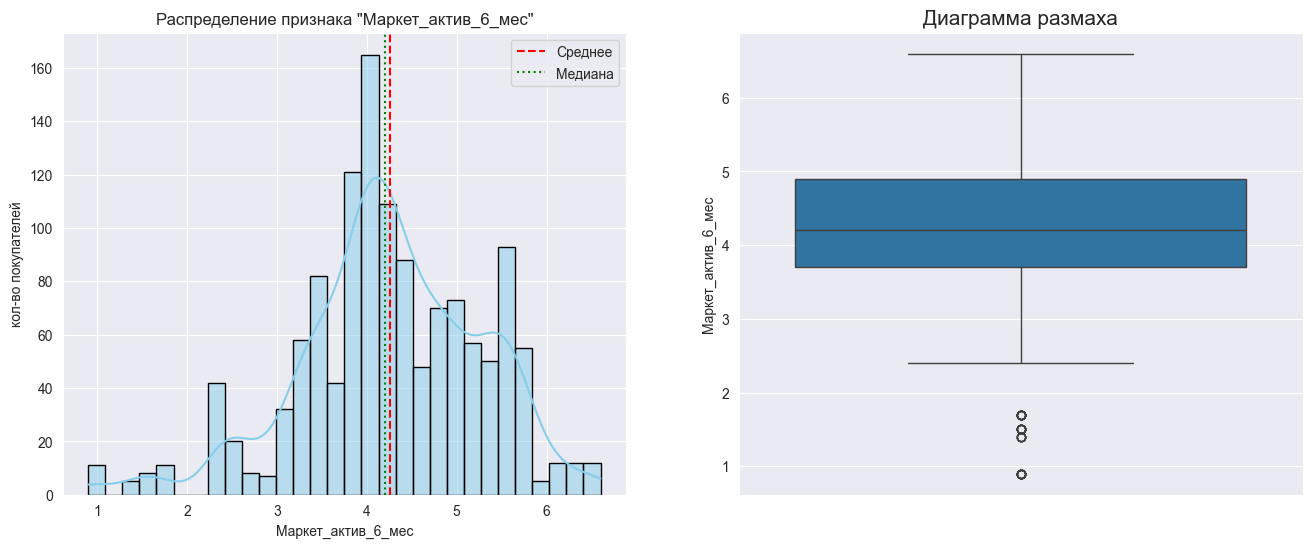

Статистика по столбцу 'Акционные_покупки':


,count,mean,std,min,25%,50%,75%,max,median
Акционные_покупки,"1,296.00",0.32,0.25,0.11,0.17,0.24,0.30,0.99,0.24


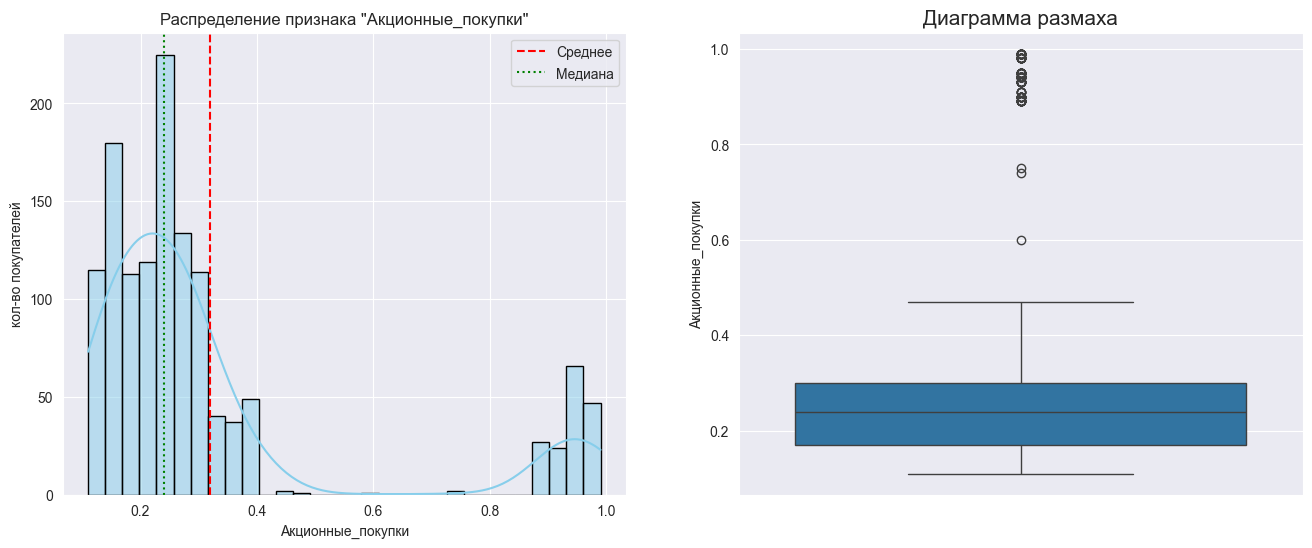

Статистика по столбцу 'Длительность':


,count,mean,std,min,25%,50%,75%,max,median
Длительность,"1,296.00",602.97,249.20,121.00,409.50,606.50,806.25,"1,079.00",606.50


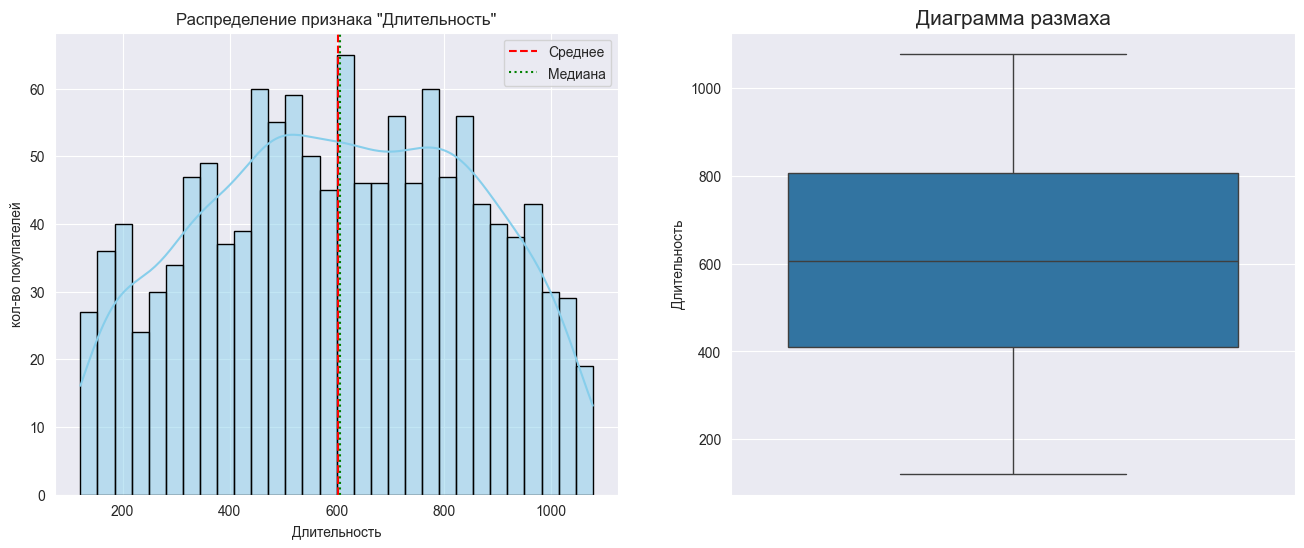

In [147]:
custom_hist(add_columns=['Длительность'])

#### Построим графики для дискретных количественных значений датафрейма market_file.

Статистика по столбцу 'Маркет_актив_тек_мес':


,count,mean,std,min,25%,50%,75%,max,median
Маркет_актив_тек_мес,"1,296.00",4.01,0.70,3.00,4.00,4.00,4.00,5.00,4.00


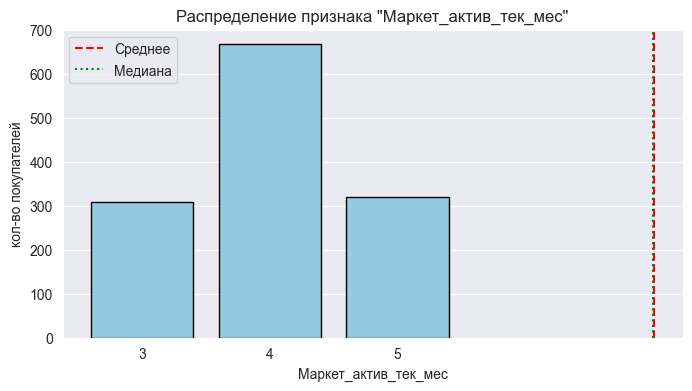

Статистика по столбцу 'Средний_просмотр_категорий_за_визит':


,count,mean,std,min,25%,50%,75%,max,median
Средний_просмотр_категорий_за_визит,"1,296.00",3.27,1.36,1.00,2.00,3.00,4.00,6.00,3.00


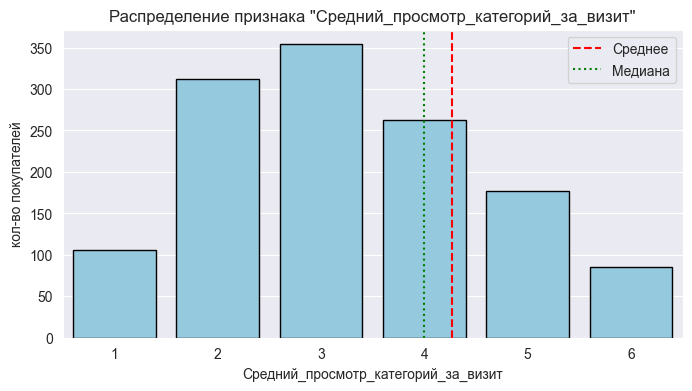

Статистика по столбцу 'Неоплаченные_продукты_штук_квартал':


,count,mean,std,min,25%,50%,75%,max,median
Неоплаченные_продукты_штук_квартал,"1,296.00",2.84,1.97,0.00,1.00,3.00,4.00,10.00,3.00


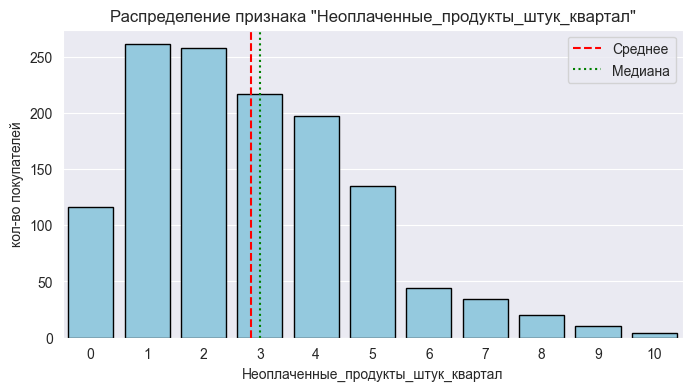

Статистика по столбцу 'Ошибка_сервиса':


,count,mean,std,min,25%,50%,75%,max,median
Ошибка_сервиса,"1,296.00",4.18,1.95,0.00,3.00,4.00,6.00,9.00,4.00


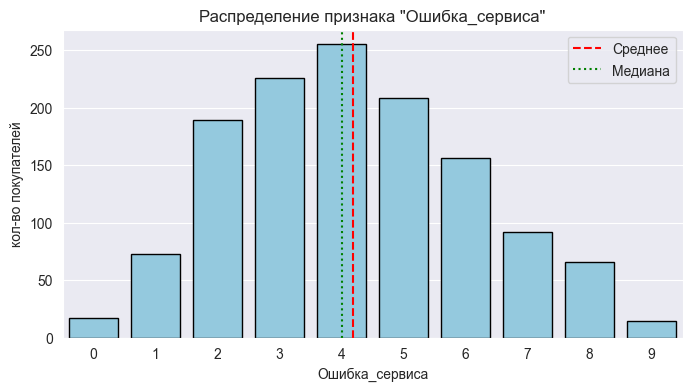

Статистика по столбцу 'Страниц_за_визит':


,count,mean,std,min,25%,50%,75%,max,median
Страниц_за_визит,"1,296.00",8.19,3.98,1.00,5.00,8.00,11.00,20.00,8.00


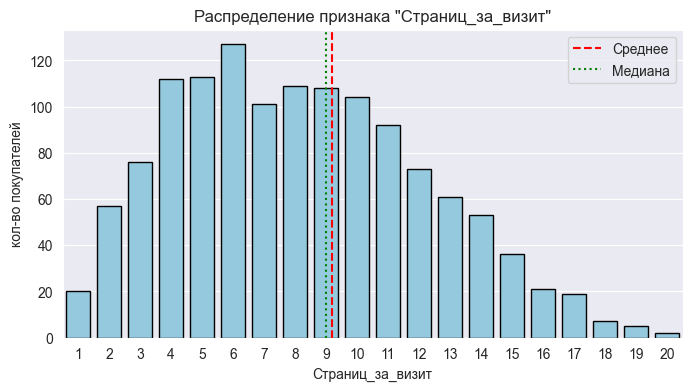

In [148]:
custom_count_plot()

#### Построим графики для непрерывных количественных значений датафрейма market_money.

Статистика по столбцу 'Выручка':


,count,mean,std,min,25%,50%,75%,max,median
Выручка,"3,888.00","5,007.26",679.19,"2,758.70","4,591.95","4,959.00","5,363.00","7,799.40","4,959.00"


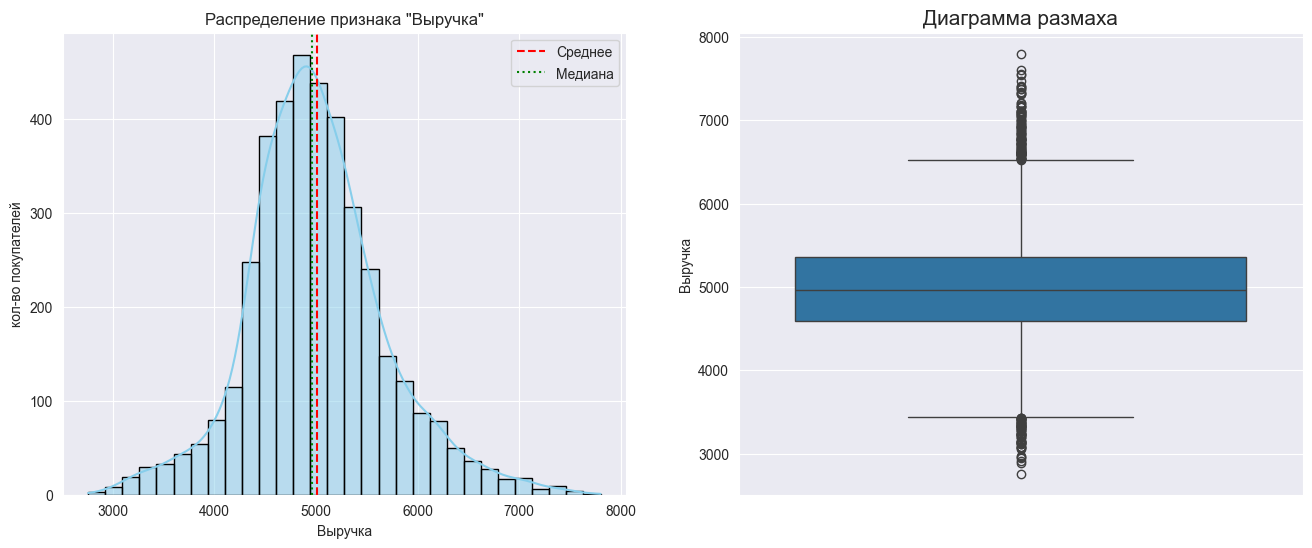

In [149]:
custom_hist(df=market_money)

#### Построим графики для дискретных количественных значений датафрейма market_time.

Статистика по столбцу 'Минуты':


,count,mean,std,min,25%,50%,75%,max,median
Минуты,"2,592.00",13.34,4.08,4.00,10.00,13.00,16.00,23.00,13.00


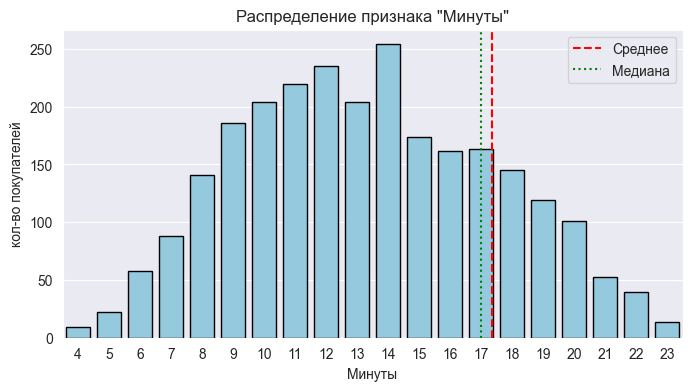

In [150]:
custom_count_plot(df=market_time, del_columns=[ID])

In [151]:
print('Поля датафрейма market_file до объединения с market_money и market_time.')
custom_info(market_file)

Поля датафрейма market_file до объединения с market_money и market_time.


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 13


In [152]:
print('Поля датафрейма market_file до объединения с market_money и market_time.')
custom_info(market_file)

Поля датафрейма market_file до объединения с market_money и market_time.


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 13


#### Построим графики для непрерывных количественных значений датафрейма money.

Статистика по столбцу 'Прибыль':


,count,mean,std,min,25%,50%,75%,max,median
Прибыль,"1,296.00",4.00,1.01,0.86,3.30,4.04,4.67,7.43,4.04


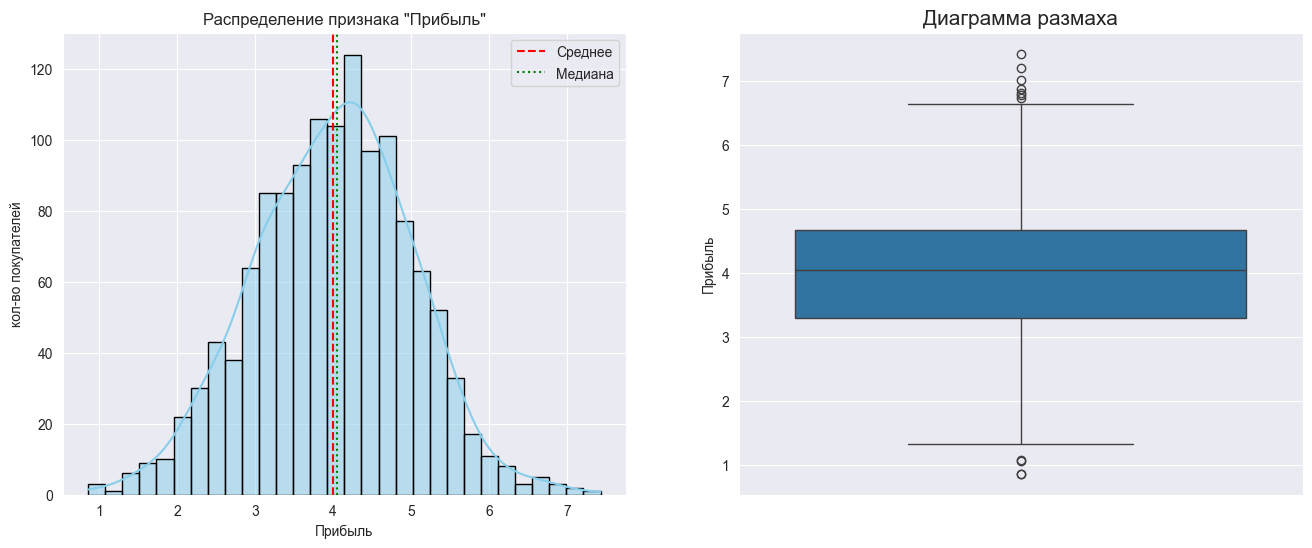

In [153]:
custom_hist(df=money)

### Проверка категориальных значений.

#### Построим графики для категориальных значений датафрейма market_file.

In [154]:
# Построение графиков для исследовательского анализа данных.
def graph_data_analysis(value, figsize=(15,5), text='', graph=True,
                        table=False, rot=0, pie=False, xlabel='',
                        xlim=(0, 230), index='',
                        values=ID, kind='barh',
                        labels = ['one', 'two']):
    """График исследовательского анализа данных."""
    try:
        total_count = len(value)
        result = (
            (value.pivot_table(index=index, 
                               values=values, 
                               aggfunc=['count', lambda res: (res.count()/total_count) * 100]))
            )
        result.columns = ['count', 'perc']
        result = result.sort_values(by='count', ascending=True)     

        if table:
            display(result.T)

        if graph:
            fig, ax = plt.subplots()
            if kind == 'barh':
                count = 0
                for val, per in zip(result['count'].values, result['perc'].values):
                    ax.text(val, count, f' {val:.0f} / {per:.2f}% ', 
                            horizontalalignment='right', verticalalignment='center', 
                            fontdict={'fontweight':500, 'size':10},
                            color=COLOR_TWO)
                    count += 1
            
            result['count'].plot(kind=kind, figsize=figsize, rot=rot, 
                                 legend=False, fontsize=14, ax=ax);
            ax.grid(linestyle='--', alpha=0.5)
            ax.set_title(f'{text}\n', fontsize=14, color=COLOR_ONE)
            ax.set_xlabel(f'{xlabel}', fontsize=12, color=COLOR_ONE)
            ax.set_ylabel(f'{text}', fontsize=12, color=COLOR_ONE)
            plt.xlim(xlim)

        if pie:
            labels = result.index.values.tolist()
            result = list((result)['perc'].to_dict().values())
            
            fig, ax = plt.subplots()
            labels = labels

            ax.pie(result, 
            labels=labels, 
            autopct='%1.2f%%', 
            shadow=True,
            wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, 
            rotatelabels=False)
            ax.axis('equal')

    except Exception as error:
        print(f'Произошла ошибка в первой части функции: {error}')

##### Признак - покупательская_активность.

Покупательская_активность,Снизилась,Прежний уровень
count,494.00,802.00
perc,38.12,61.88


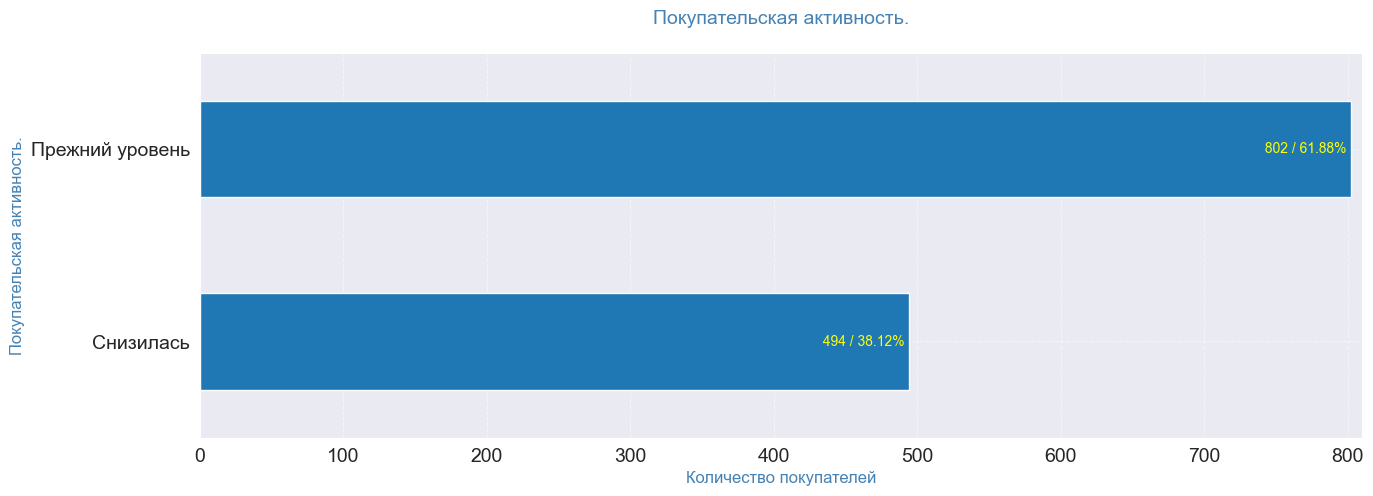

In [155]:
data_frame = market_file
text = 'Покупательская активность.'
xlabel = 'Количество покупателей'
index = 'Покупательская_активность'
graph_data_analysis(data_frame, table=True, xlim=(0, 810),
                    text=text, xlabel=xlabel, index=index)

##### Признак - тип сервиса.

Тип_сервиса,премиум,стандарт
count,374.00,922.00
perc,28.86,71.14


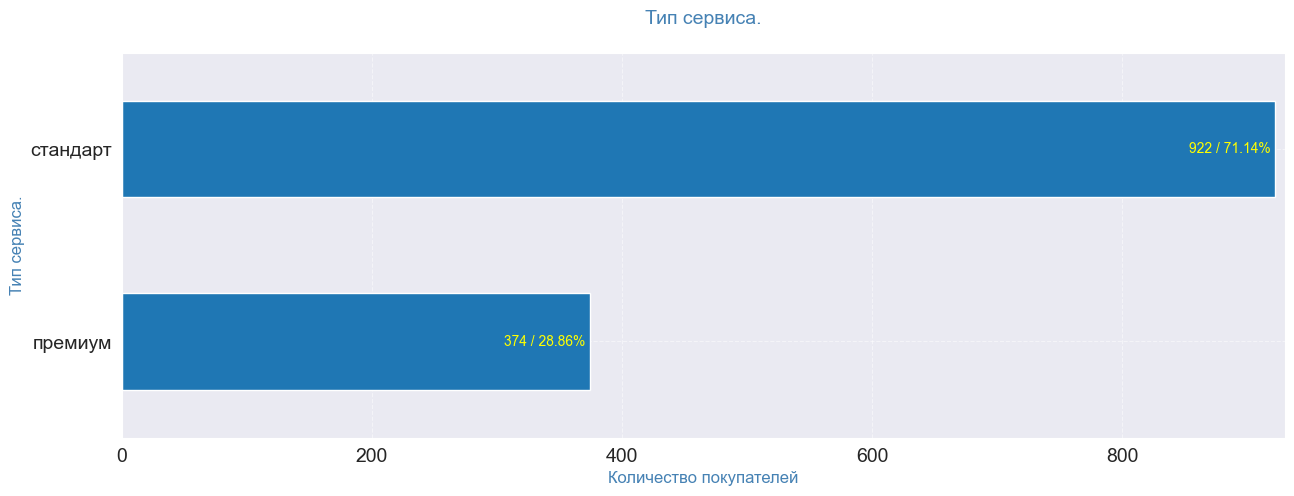

In [156]:
text = 'Тип сервиса.'
index = 'Тип_сервиса'
graph_data_analysis(data_frame, table=True, xlim=(0, 930),
                    text=text, xlabel=xlabel, index=index)

##### Признак - разрешить сообщать.

Разрешить_сообщать,нет,да
count,337.00,959.00
perc,26.00,74.00


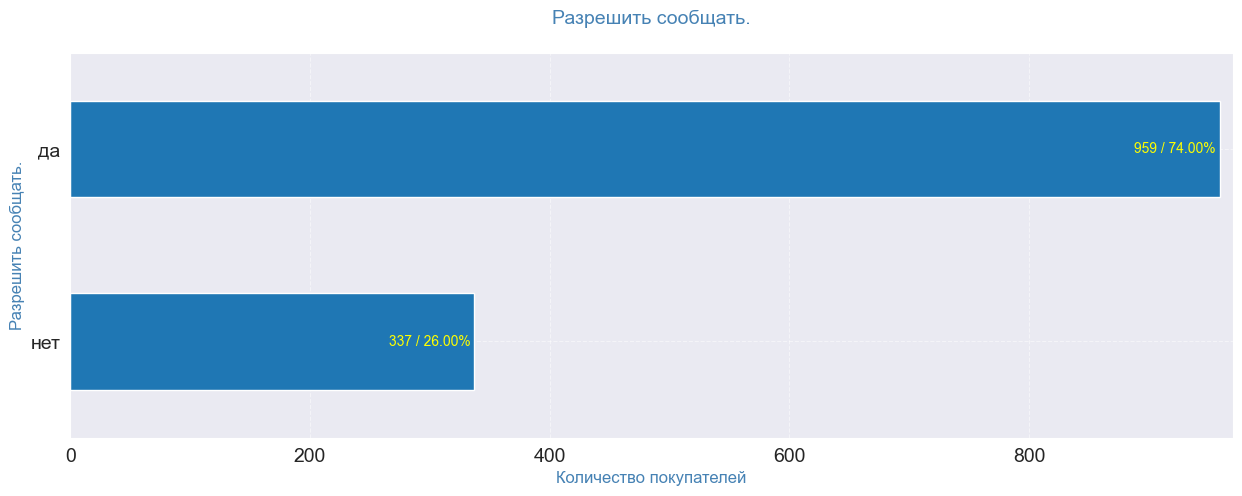

In [157]:
text = 'Разрешить сообщать.'
index = 'Разрешить_сообщать'
graph_data_analysis(data_frame, table=True, xlim=(0, 970),
                    text=text, xlabel=xlabel, index=index)

##### Признак - популярная категория.

Популярная_категория,Кухонная посуда,Мелкая бытовая техника и электроника,Техника для красоты и здоровья,Косметика и аксесуары,Домашний текстиль,Товары для детей
count,138.00,174.00,182.00,223.00,250.00,329.00
perc,10.65,13.43,14.04,17.21,19.29,25.39


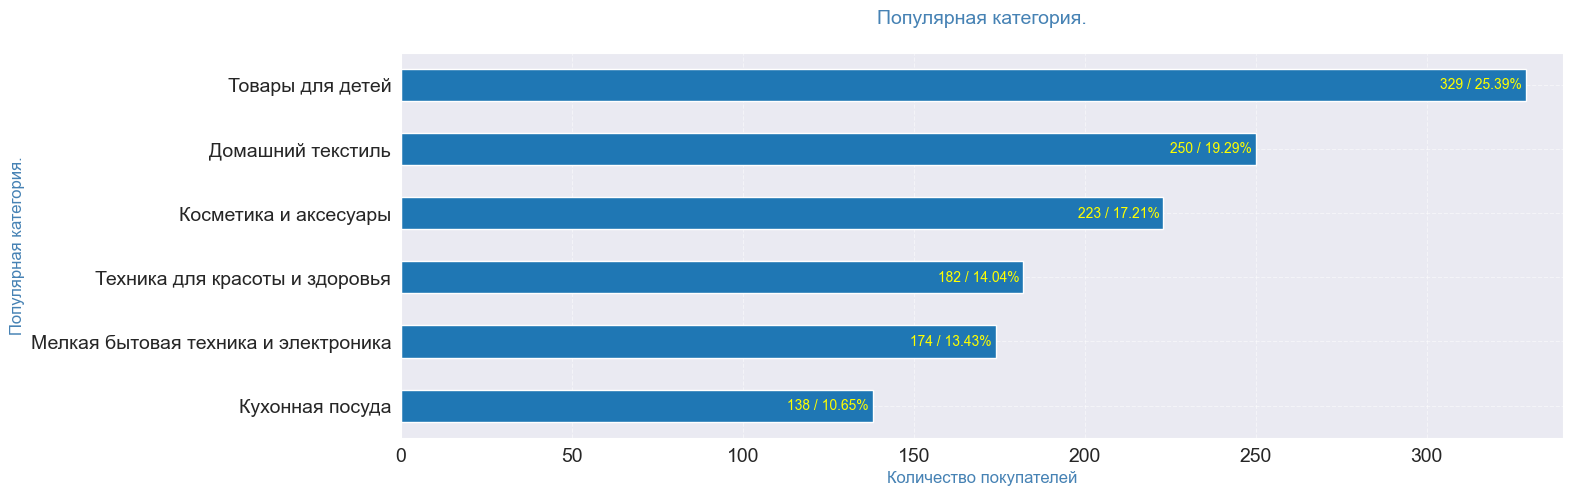

In [158]:
text = 'Популярная категория.'
index = 'Популярная_категория'
graph_data_analysis(data_frame, table=True, xlim=(0, 340),
                    text=text, xlabel=xlabel, index=index)

#### Построим графики для категориальных значений датафрейма market_money.

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,"1,296.00","1,296.00","1,296.00"
perc,33.33,33.33,33.33


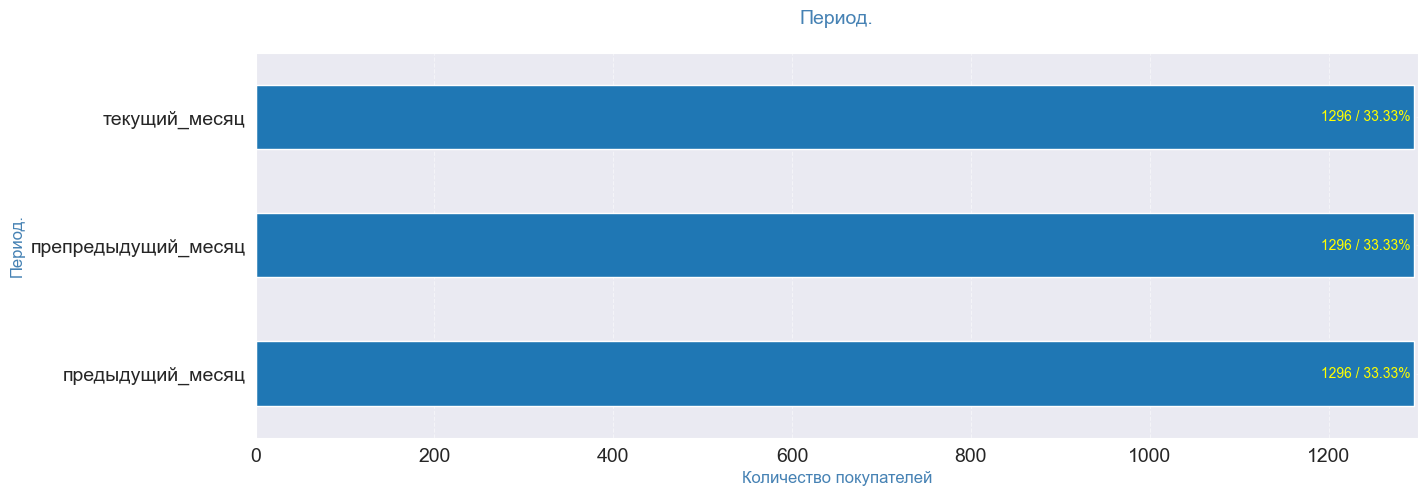

In [159]:
data_frame = market_money
text = 'Период.'
xlabel = 'Количество покупателей'
index = 'Период'
graph_data_analysis(data_frame, table=True, xlim=(0, 1300),
                    text=text, xlabel=xlabel, index=index)

#### Построим графики для категориальных значений датафрейма market_time.

Период,предыдущий_месяц,текущий_месяц
count,"1,296.00","1,296.00"
perc,50.00,50.00


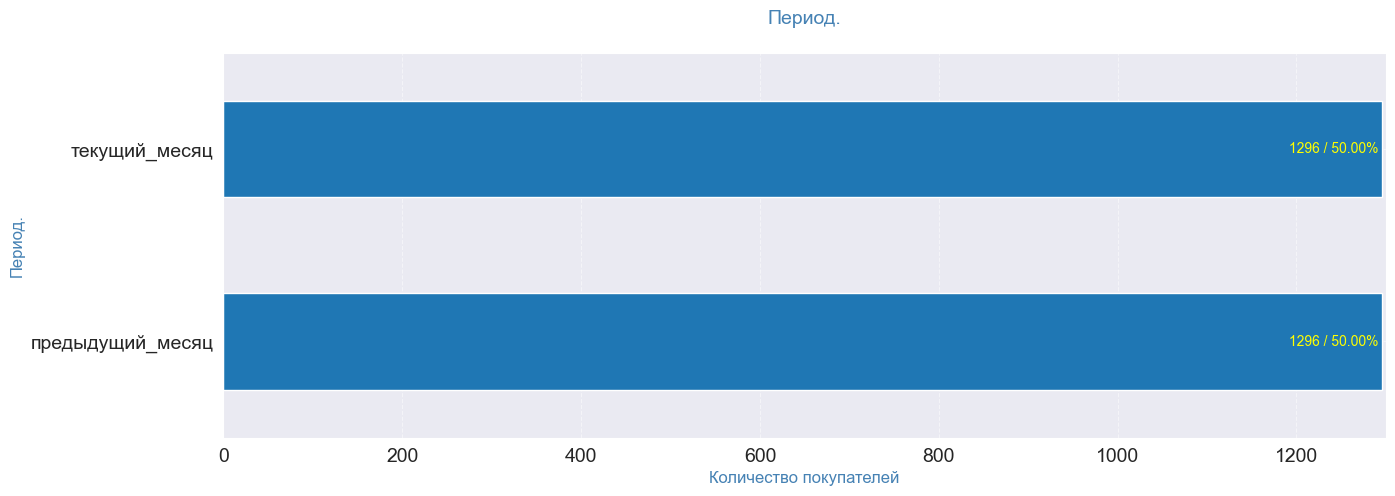

In [160]:
data_frame = market_time
text = 'Период.'
xlabel = 'Количество покупателей'
index = 'Период'
graph_data_analysis(data_frame, table=True, xlim=(0, 1300),
                    text=text, xlabel=xlabel, index=index)

### Отбор клиентов с покупательской активностью не менее трёх месяцев.

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [161]:
result = market_money[(market_money['Выручка'] != ZERO)]
custom_info(result, sample=True)

,non_null_count,dtype
id,3888,int64
Период,3888,object
Выручка,3888,float64


Количество записей: 3888
Количество столбцов: 3


,1784,1685,2510,1238,3512,619,669,2800,893,3178
id,215942,215909,216184,215760,216518,215554,215571,216281,215645,216407
Период,препредыдущий_месяц,препредыдущий_месяц,препредыдущий_месяц,препредыдущий_месяц,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,препредыдущий_месяц,предыдущий_месяц,препредыдущий_месяц
Выручка,"4,629.00","4,566.00","4,542.00","5,089.00","4,434.00","4,733.00","5,719.80","4,771.00","5,170.50","4,365.00"


**Вывод шаг №3**<br/>
По результату проведения исследовательского анализа данных, делаем следующие выводы:
* Выявили и устранили выброс 106,862.20 в поле 'Выручка	', значение выброса превышало среднее значение в 21.3 раза.
* Удалили троих пользователей с нулевой активностью.
* Построили графики для непрерывных количественных значений датафреймов market_file, market_money и money, вывели гистограмму и диаграмму размаха. Практически все параметры распределены нормально, есть выбросы.
* Построили графики для дискретных количественных значений датафреймов market_file и market_time, вывели гистограмму. Аномальных значений не выявили, практически все параметры распределены нормально.
* Построили графики для категориальных значений датафреймов market_file, market_money и market_time, вывели столбчатую диаграмму. Аномалий не выявлено.
* Отобрали клиентов с покупательской активностью не менее трёх месяцев. По результату отбора неактивные клиенты в выборке отсутствуют.

## Объединение таблиц

In [162]:
print('Поля датафрейма market_file до объединения с market_money и market_time.')
custom_info(market_file)

Поля датафрейма market_file до объединения с market_money и market_time.


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 13


In [163]:
# Метод для конвертации значений полей в отдельный столбец.
def convert_row(data, column='Период', value='Выручка'):
    result = data.copy()
    result = result.pivot_table(index=ID, columns=column, values=value)
    return result.add_prefix(f'{value}_')

Подготовим датафрейм market_money для объединения с датафреймом market_file.<br/>
Преобразуем значения поля 'Период' в отдельный столбец для каждого периода и поместим в него данные о выручке в соответствии с идентификатором покупателя.

In [164]:
print('Поля датафрейма market_money до преобразования.')
custom_info(market_money)

Поля датафрейма market_money до преобразования.


,non_null_count,dtype
id,3888,int64
Период,3888,object
Выручка,3888,float64


Количество записей: 3888
Количество столбцов: 3


In [165]:
market_money = convert_row(market_money)

In [166]:
print('Поля датафрейма market_money после преобразования.')
custom_info(market_money, sample=True, sample_quantity=SIX)

Поля датафрейма market_money после преобразования.


,non_null_count,dtype
Период,,
Выручка_предыдущий_месяц,1296,float64
Выручка_препредыдущий_месяц,1296,float64
Выручка_текущий_месяц,1296,float64


Количество записей: 1296
Количество столбцов: 3


id,215496,216641,216188,215420,215402,216057
Период,,,,,,
Выручка_предыдущий_месяц,"5,020.00","5,654.50","5,170.00","5,264.00","4,918.00","5,702.00"
Выручка_препредыдущий_месяц,"4,896.00","5,176.00","5,428.00","4,568.00","4,702.00","4,730.00"
Выручка_текущий_месяц,"5,237.10","6,199.20","5,076.40","5,200.30","4,940.10","4,989.60"


Подготовим датафрейм market_time для объединения с датафреймом market_file.<br/>
Преобразуем значения поля 'Период' в отдельный столбец для каждого периода и поместим в него данные о временя в соответствии с идентификатором покупателя.

In [167]:
print('Поля датафрейма market_time до преобразования.')
custom_info(market_time)

Поля датафрейма market_time до преобразования.


,non_null_count,dtype
id,2592,int64
Период,2592,object
Минуты,2592,int64


Количество записей: 2592
Количество столбцов: 3


In [168]:
market_time = convert_row(market_time, value='Минуты')
display(market_time.sample(SIX).T)

id,216073,215500,215578,215769,216232,216047
Период,,,,,,
Минуты_предыдущий_месяц,9.00,11.00,10.00,12.00,11.00,16.00
Минуты_текущий_месяц,20.00,12.00,7.00,9.00,19.00,18.00


In [169]:
print('Поля датафрейма market_time после преобразования.')
custom_info(market_time, sample=True, sample_quantity=SIX)

Поля датафрейма market_time после преобразования.


,non_null_count,dtype
Период,,
Минуты_предыдущий_месяц,1296,float64
Минуты_текущий_месяц,1296,float64


Количество записей: 1296
Количество столбцов: 2


id,215407,216172,216590,215873,215875,216224
Период,,,,,,
Минуты_предыдущий_месяц,9.00,16.00,19.00,16.00,9.00,19.00
Минуты_текущий_месяц,13.00,16.00,14.00,17.00,18.00,14.00


In [170]:
# Объединим датафреймы market_file с market_money и market_time по полю id.
market = market_file.merge(
    market_money, how='left', on=ID).merge(
        market_time, how='left', on=ID)

In [171]:
print('Поля датафрейма market после объединения с market_money и market_time.')
custom_info(market, sample=True, sample_quantity=SIX)

Поля датафрейма market после объединения с market_money и market_time.


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 18


,161,824,337,493,612,85
id,215513,216176,215689,215845,215964,215437
Покупательская_активность,Снизилась,Прежний уровень,Снизилась,Снизилась,Прежний уровень,Снизилась
Тип_сервиса,премиум,стандарт,стандарт,стандарт,стандарт,премиум
Разрешить_сообщать,нет,да,нет,да,да,да
Маркет_актив_6_мес,3.40,5.20,5.00,4.70,5.70,2.40
Маркет_актив_тек_мес,4,3,4,4,4,3
Длительность,845,343,136,608,228,602
Акционные_покупки,0.22,0.30,0.27,0.95,0.23,0.32
Популярная_категория,Домашний текстиль,Косметика и аксесуары,Товары для детей,Техника для красоты и здоровья,Техника для красоты и здоровья,Косметика и аксесуары
Средний_просмотр_категорий_за_визит,2,4,3,5,4,2


**Вывод шаг №4**<br/>
По результату проведения объединения таблиц, делаем следующие выводы:
* Выделили отдельные поля в датафреймах market_money и market_time для каждого периода.
* Объединили датафреймы market_file с market_money и market_time по полю id. По результату получили итоговый датафрейм market.

## Корреляционный анализ

### Рассчет коэффициентов корреляции.

In [172]:
# Составим список с числовыми непрерывными категориями.
cols_num = (market
        .drop(columns=[ID, 
                       'Минуты_предыдущий_месяц',
                       'Минуты_текущий_месяц'])
        .select_dtypes(exclude=['object', 'int64'])
        .columns.to_list())
cols_num.extend(['Длительность'])

In [173]:
# Отобразим список передаваемых непрерывных признаков.
display(cols_num)

['Маркет_актив_6_мес',
 'Акционные_покупки',
 'Выручка_предыдущий_месяц',
 'Выручка_препредыдущий_месяц',
 'Выручка_текущий_месяц',
 'Длительность']

Проверим линейную связь между признаками с помощью матрицы корреляции.<br/>
Для модели линейной регрессии линейная зависимость между целевыми и входными признаками обязательна, иначе предсказания будут ошибочными.

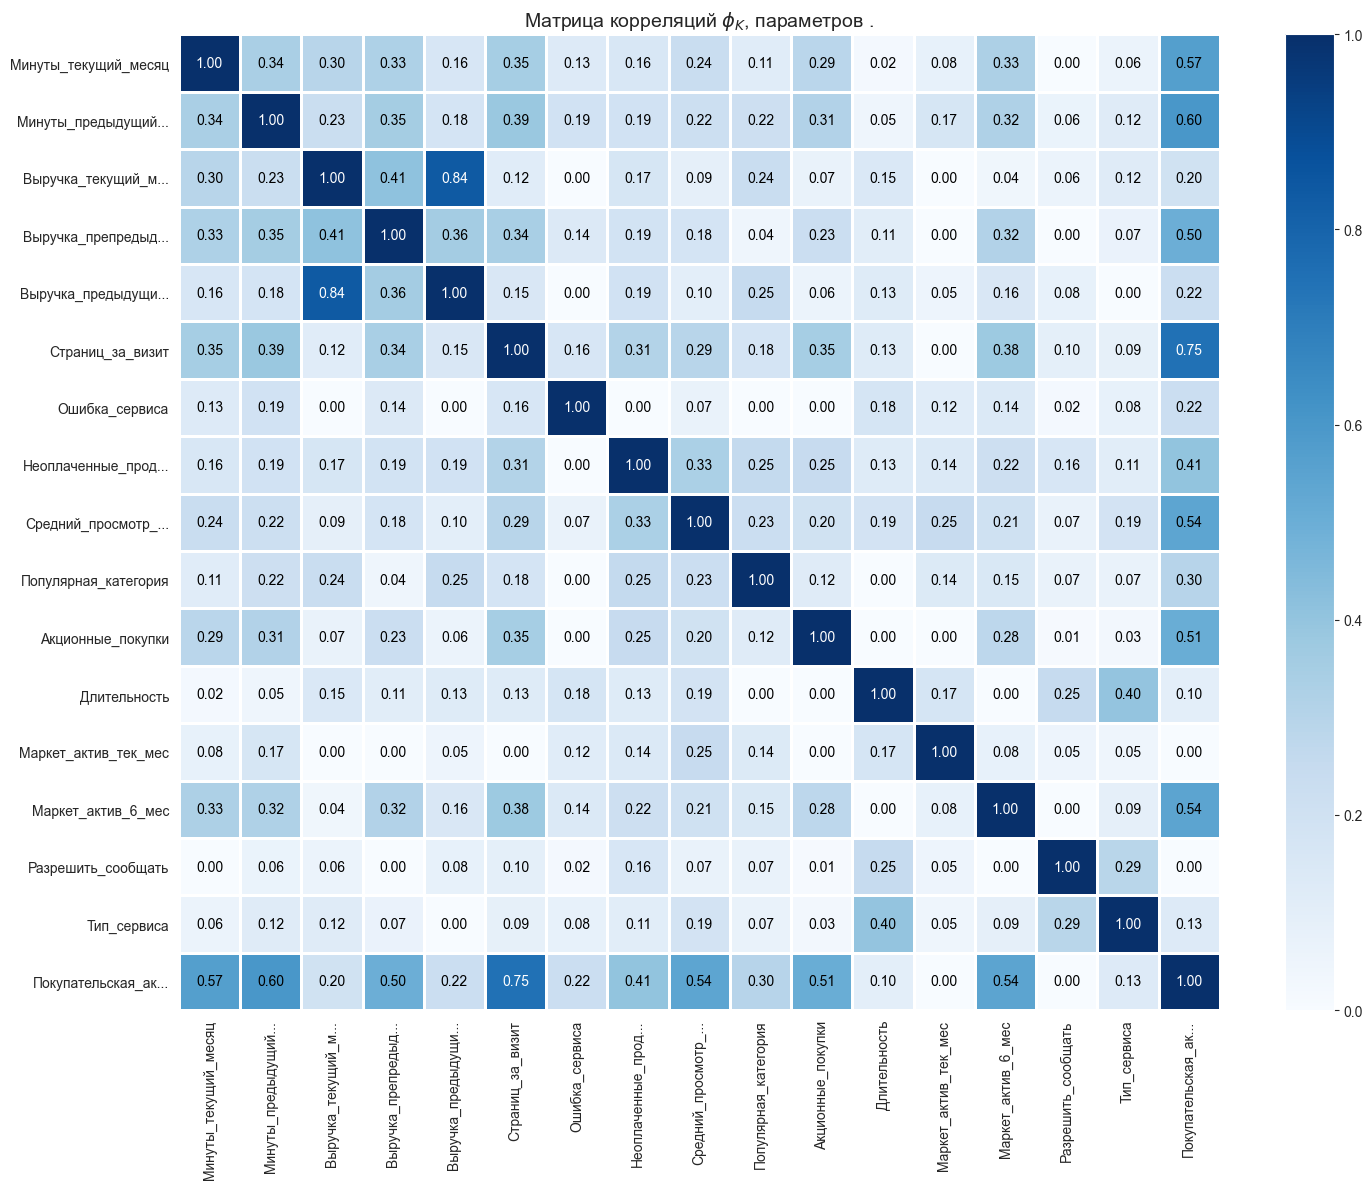

In [174]:
# 
result = market.drop(columns=ID)
phik_overview = phik_matrix(result, interval_cols=cols_num)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0.000, color_map=COLOR_FOUR,
    title=r'Матрица корреляций $\phi_K$, параметров .',
    fontsize_factor=1.0,
    figsize=(15, 12)
)

In [175]:
display(phik_overview['Покупательская_активность']
        .to_frame()
        .sort_values('Покупательская_активность', ascending=False))

,Покупательская_активность
Покупательская_активность,1.00
Страниц_за_визит,0.75
Минуты_предыдущий_месяц,0.60
Минуты_текущий_месяц,0.57
Маркет_актив_6_мес,0.54
Средний_просмотр_категорий_за_визит,0.54
Акционные_покупки,0.51
Выручка_препредыдущий_месяц,0.50
Неоплаченные_продукты_штук_квартал,0.41
Популярная_категория,0.30


Интерпретируем полученные результаты коэффициента корреляции Пирсона с помощью шкалы Чеддока, исходя из уровня силы связи целевого признака 'Покупательская_активность' с входными признаками.<br/>
Наблюдаем отсутствие связи целевого с входными признаками: Разрешить_сообщать - 0, Маркет_актив_тек_мес - 0.<br/>
Слабая связь (значение коэффициента 0.1-0.3) целевого с входными признаками: Длительность - 0.1, Тип_сервиса - 0.13, Выручка_текущий_месяц - 0.20, Ошибка_сервиса - 0.22, Выручка_предыдущий_месяц - 0.22.<br/>
Умеренная связь (значение коэффициента 0.3-0.5) целевого с входным признаком: Популярная_категория - 0.30, Неоплаченные_продукты_штук_квартал - 0.41.<br/>
Заметная связь (значение коэффициента 0.5-0.7) целевого с входными признаками: Выручка_препредыдущий_месяц - 0.5, Акционные_покупки - 0.51, Маркет_актив_6_мес - 0.54, Средний_просмотр_категорий_за_визит - 0.54, Минуты_текущий_месяц - 0.58, Минуты_предыдущий_месяц - 0.69.<br/>
Высокая связь (значение коэффициента 0.7-0.9) целевого с входными признаками: Страниц_за_визит - 0.75.<br/>

Когда у двух или нескольких признаков высокая корреляция, коэффициенты модели становятся неустойчивыми, и вычислить влияние каждого из них на таргет уже невозможно. 
Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.<br/>
В нашей ситуации между входными признаками значение высокой корреляции не замечено.

**Вывод шаг №5**<br/>
По результату проведения корреляционного анализа, делаем следующие выводы:
* Мультиколлинеарности между входными признаками датафрейма market нет.
* Интерпретировали полученные результаты коэффициента корреляции Пирсона с помощью шкалы Чеддока, исходя из уровня силы связи целевого признака Покупательская_активность с входными признаками.<br/>
Признаки: Длительность - 0.1, Тип_сервиса - 0.13, Выручка_текущий_месяц - 0.20, Ошибка_сервиса - 0.22, Выручка_предыдущий_месяц - 0.22 практически не коррелируют с покупательской активностью.<br/>
С покупательской активностью сильнее всего связаны признаки: Выручка_препредыдущий_месяц - 0.5, Акционные_покупки - 0.51, Неоплаченные_продукты_штук_квартал - 0.51, Маркет_актив_6_мес - 0.54, Средний_просмотр_категорий_за_визит - 0.54, Минуты_текущий_месяц - ~~0.58~~ 0.57, Минуты_предыдущий_месяц - ~~0.69~~ 0.60, Страниц_за_визит - 0.75.
* У признаков: Разрешить_сообщать, Маркет_актив_тек_мес наблюдаем отсутствие связи с целевым признаком.

## Использование пайплайнов

### Подготовка данных.

Необходимо построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

In [176]:
# Сохраним целевой признак в переменную.
target_attribute = 'Покупательская_активность'

# Делим данные на входные и целевые.
X = market.drop([target_attribute, ID], axis=1)
y = market[target_attribute]

# Делим данные на тренировочные и тестовые.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market[target_attribute]
)

# Сохраним последовательность полей тренировочной выборки до масштабирования
column_before = X_train.columns.to_list()
feature_names = market.Покупательская_активность

Перед началом поиска лучшей модели, закодируем строковые классы числами. При таком преобразовании вычисления будут выполняться быстрее.<br/>
Для кодирования целевого признака будем использовать LabelEncoder.

In [177]:
# Закодируем целевой признак, применим кодировщик к тренировочной и тестовой выборкам.
label_encoder = LabelEncoder()
y_train_before = y_train
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [178]:
# Обернём результат в датафрейм data_le.
data_le = pd.DataFrame(y_train, y_train_before, columns=['LabelEncoder']).reset_index()
print(data_le.drop_duplicates())

  Покупательская_активность  LabelEncoder
0           Прежний уровень             0
1                 Снизилась             1


Пользовательская активность со значеникм 'Прежний уровень' закодировалась - 0, а 'Снизилась' - 1.<br/>
LabelEncoder сортирует классы в лексикографическом порядке и назначает им порядковые числа.

In [179]:
# Выведем статистику по столбцам.
print('\nСтатистика по тренировочной выборке X_train.')
custom_info(X_train)
print('\nСтатистика по тестовой выборке X_test.')
custom_info(X_test, is_result=False)


Статистика по тренировочной выборке X_train.


,non_null_count,dtype
Тип_сервиса,972,object
Разрешить_сообщать,972,object
Маркет_актив_6_мес,972,float64
Маркет_актив_тек_мес,972,int64
Длительность,972,int64
Акционные_покупки,972,float64
Популярная_категория,972,object
Средний_просмотр_категорий_за_визит,972,int64
Неоплаченные_продукты_штук_квартал,972,int64
Ошибка_сервиса,972,int64


Количество записей: 972
Количество столбцов: 16

Статистика по тестовой выборке X_test.
Количество записей: 324
Количество столбцов: 16


In [180]:
# Создаём списки с названиями признаков.
ohe_columns = ['Популярная_категория']

ord_columns = ['Тип_сервиса', 'Разрешить_сообщать']

In [181]:
# Создаём список с количественными признаками для масштабирования.
num_columns = (X
                .select_dtypes(exclude='object')
                .columns.to_list())

Количественные и категориальные признаки обработаем в пайплайне раздельно.

In [182]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

In [183]:
# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [184]:
# Создаём общий пайплайн для подготовки данных.
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [185]:
# Создаём итоговый пайплайн: подготовка данных и модель.
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [186]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

        # словарь для модели SVC
    {
        'models': [
            SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)
        ],
        'models__degree': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Для использования нескольких метрик при настройке гиперпараметров с помощью RandomizedSearchCV, указываем их в параметре scoring.<br/>
При этом оптимизация проводится только по одной метрике (основной), которая указына в refit.<br/>
Дополнительные метрики вычисляются для анализа, но не влияют на выбор лучшей модели.

Для оптимизации модели выбираем метрику recall.<br/>
Такой выбор обосновываем фокусом на ошибках второго рода (false negative), в данном случае важно предсказать положительный класс.<br/>

In [187]:
# Создаем словарь используемых метрик.
scoring = {
    'roc_auc_score': make_scorer(
        roc_auc_score,
        needs_proba=True),
    'recall': 'recall',
    'f1': 'f1'
}

In [188]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scoring,
    refit='recall',  # оптимизировать модель по recall
    random_state=RANDOM_STATE,
    n_jobs=-ONE
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_bef...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(C=3,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, refit='recall',
                   scoring={'f1': 'f1', 'recall': 'recall',
                            'roc_auc_score': make_scorer(roc_auc_score, needs_proba=True)})

### Выбор лучшей модели.

In [189]:
# Выбираем лучшую модель.
model = randomized_search.best_estimator_.named_steps['models']
print(f'Лучшая модель: {model}\n')

print (f'Метрика лучшей модели на кросс-валидации: {randomized_search.best_score_:.3f}')

Лучшая модель: LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')

Метрика лучшей модели на кросс-валидации: 0.760


In [190]:
# Проверяем работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных.
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика roc_auc на тестовой выборке: {roc_auc_score(y_test, y_test_proba):.3f}')
print(f'Метрика f1 на тестовой выборке: {f1_score(y_test, y_test_pred):.3f}')

# Поскольку refit = 'recall'.
print(f'Метрика recall на тестовой выборке: {randomized_search.score(X_test, y_test):.3f}')

Метрика roc_auc на тестовой выборке: 0.916
Метрика f1 на тестовой выборке: 0.867
Метрика recall на тестовой выборке: 0.821


### Проверка лучшей модели на адекватность.

In [191]:
# Делим данные на входные и целевые.
X = market.drop([target_attribute, ID], axis=1)
y = market[target_attribute]

# Делим данные на тренировочные и тестовые.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market[target_attribute]
)

In [192]:
# Закодируем целевой признак, применим кодировщик к тренировочной и тестовой выборкам.
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [193]:
# Сделаем предсказание на константной модели.
model_dummy = DummyClassifier(strategy="uniform", random_state=RANDOM_STATE)
model_dummy.fit(X_train, y_train)
y_test_pred_dummy = model_dummy.predict(X_test)
y_test_proba_dummy = model_dummy.predict_proba(X_test)[:,1]

In [194]:
print(f'Метрика roc_auc на тестовой выборке: {roc_auc_score(y_test, y_test_proba_dummy):.3f}')
print(f'Метрика f1 на тестовой выборке: {f1_score(y_test, y_test_pred_dummy):.3f}')
print(f'Метрика recall на тестовой выборке: {recall_score(y_test, y_test_pred_dummy):.3f}')

Метрика roc_auc на тестовой выборке: 0.500
Метрика f1 на тестовой выборке: 0.400
Метрика recall на тестовой выборке: 0.463


**Вывод шаг №6**<br/>
По результату использования пайплайнов, делаем следующие выводы:
* По результату использования одного общего пайплайна для всех моделей и инструмента подбора гиперпараметров, была выбрана лучшая модель LogisticRegression с параметрами C=4, penalty='l1', random_state=42, solver='liblinear'.
* Метрика лучшей модели на кросс-валидации: 0.757
* Метрика recall на тестовой выборке: 0.821
* По результату проверки лучшей модели на адекватность, качество ее предсказаний оказалось лучше, чем константной модели DummyClassifier.

## Анализ важности признаков

### Оценка важности признаков для лучшей модели и построение графика важности с помощью метода SHAP.

In [195]:
# Кодируем тренировочную и тестовую выборки.
X_train_shap = randomized_search.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)
X_test_shap = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

In [196]:
# Обработаем названия признаков после кодирования.
feature_names = (
    np.vectorize(lambda x: x[5:])
    (randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()))
print(feature_names)

['Популярная_категория_Косметика и аксесуары'
 'Популярная_категория_Кухонная посуда'
 'Популярная_категория_Мелкая бытовая техника и электроника'
 'Популярная_категория_Техника для красоты и здоровья'
 'Популярная_категория_Товары для детей' 'Тип_сервиса'
 'Разрешить_сообщать' 'Маркет_актив_6_мес' 'Маркет_актив_тек_мес'
 'Длительность' 'Акционные_покупки' 'Средний_просмотр_категорий_за_визит'
 'Неоплаченные_продукты_штук_квартал' 'Ошибка_сервиса' 'Страниц_за_визит'
 'Выручка_предыдущий_месяц' 'Выручка_препредыдущий_месяц'
 'Выручка_текущий_месяц' 'Минуты_предыдущий_месяц' 'Минуты_текущий_месяц']


In [197]:
# Вычисляем SHAP-значения
explainer = shap.Explainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

Строим график важности признаков.

In [198]:
def shap_summary_plot(plot_type='bar'):
    shap.summary_plot(
        shap_values,
        X_test_shap,
        feature_names=feature_names,
        plot_type=plot_type,
        plot_size=(12, 8),
        show=False
        )
    plt.xlabel('SHAP-значение')
    plt.ylabel('Признак', fontsize=14)
    plt.title('Распределение влияния признаков', fontsize=14)
    plt.show()

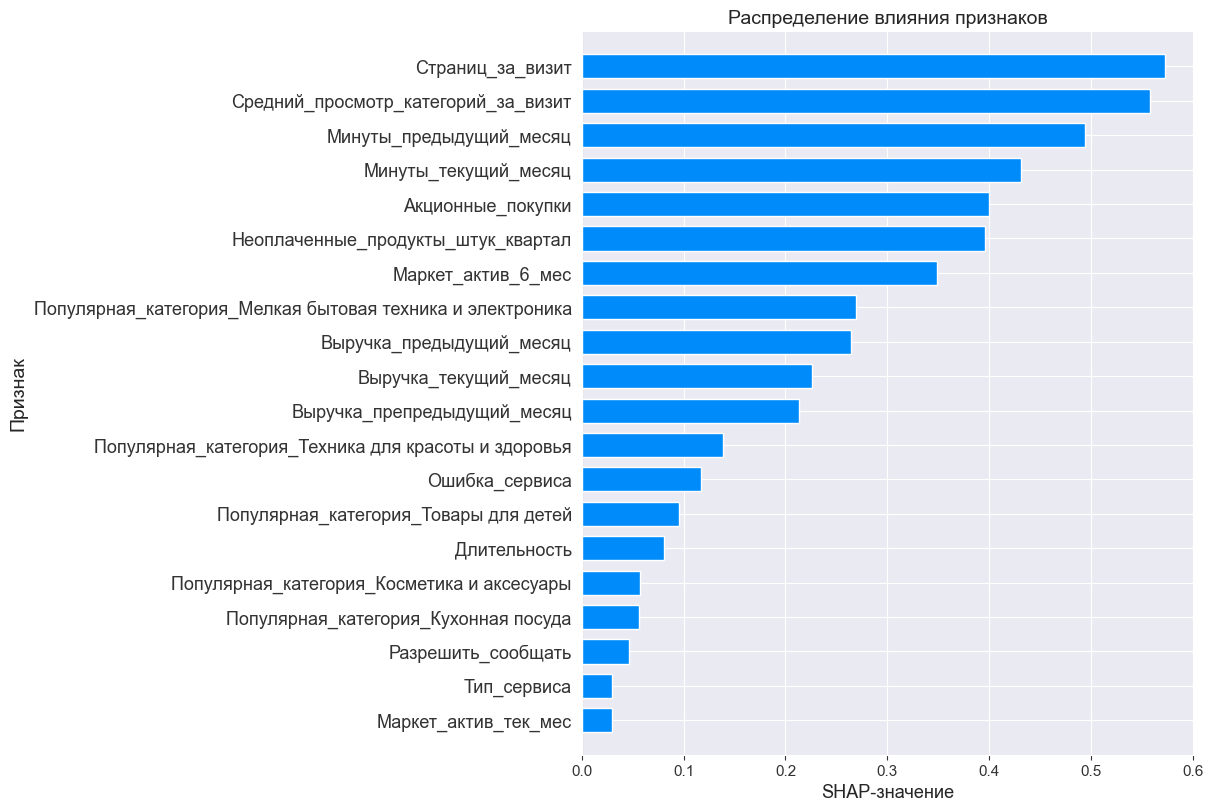

In [199]:
shap_summary_plot()

Лидирует по значимости параметр 'Страниц_за_визит' далее идет 'Средний_просмотр_категорий_за_визит' и на третьем месте 'Минуты_предыдущий_месяц'.<br/>
Признаки на графике расположены в порядке убывания их вклада.<br/>
Посмотрим, как признаки влияют на каждое предсказание модели:

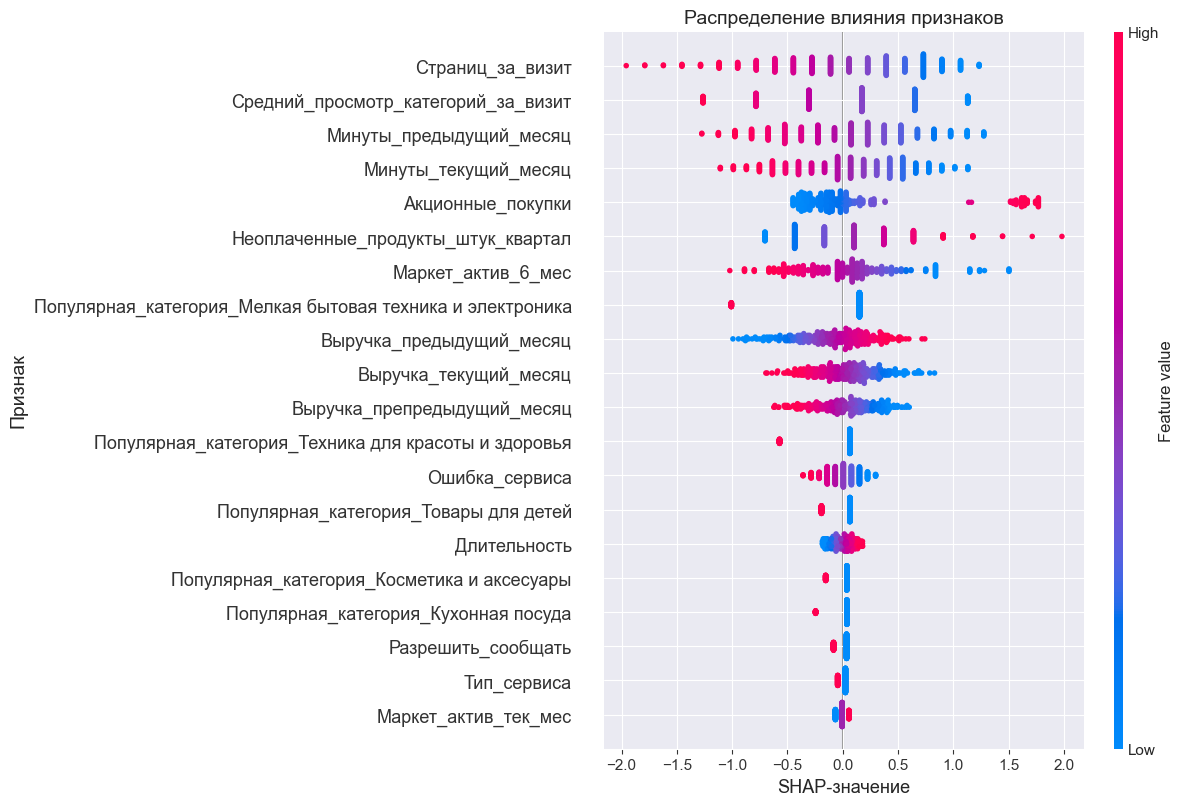

In [200]:
# Влияние признаков на каждое предсказание модели.
shap_summary_plot(plot_type='dot')

**Вывод шаг №7**<br/>
По результату анализа важности признаков, делаем следующие выводы:
* Признаки 'Разрешить_сообщать_нет', 'Маркет_актив_тек_мес' и 'Тип_сервиса' мало значимы для модели;
* Признаки 'Страниц_за_визит', 'Средний_просмотр_категорий_за_визит' и 'Минуты_предыдущий_месяц' сильнее всего влияют на целевой признак.

## Сегментация покупателей

### Выполнение сегментации покупателей.

#### Добавление новых признаков в датафрейм market.

In [201]:
print('Поля датафрейма market до объединения с money и добавления признака .')
custom_info(market)

Поля датафрейма market до объединения с money и добавления признака .


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 18


Добавим данные о прибыльности покупателей.

In [202]:
# Объединим датафрейм market с money по полю id.
market = market.merge(money, how='left', on=ID)

Используя результаты моделирования добавим новый признак вероятность снижения покупательской активности клиента.

In [203]:
# Добавим новый признак вероятность снижения покупательской активности клиента в датафрейм market.
market['Вероятность_снижения_активности'] = (
    randomized_search.predict_proba(market.drop([target_attribute, ID], axis=1))[:,1])

In [204]:
print('Поля датафрейма market после объединения с money и добавления нового признака.')
custom_info(market, sample=True, sample_quantity=SIX)

Поля датафрейма market после объединения с money и добавления нового признака.


,non_null_count,dtype
id,1296,int64
Покупательская_активность,1296,object
Тип_сервиса,1296,object
Разрешить_сообщать,1296,object
Маркет_актив_6_мес,1296,float64
Маркет_актив_тек_мес,1296,int64
Длительность,1296,int64
Акционные_покупки,1296,float64
Популярная_категория,1296,object
Средний_просмотр_категорий_за_визит,1296,int64


Количество записей: 1296
Количество столбцов: 20


,1148,535,442,1015,1195,57
id,216500,215887,215794,216367,216547,215409
Покупательская_активность,Прежний уровень,Прежний уровень,Прежний уровень,Прежний уровень,Прежний уровень,Снизилась
Тип_сервиса,стандарт,стандарт,премиум,премиум,стандарт,премиум
Разрешить_сообщать,да,нет,да,да,нет,да
Маркет_актив_6_мес,3.90,4.60,5.50,4.60,4.00,1.40
Маркет_актив_тек_мес,5,4,4,3,3,4
Длительность,296,213,597,568,509,857
Акционные_покупки,0.24,0.24,0.15,0.28,0.25,0.95
Популярная_категория,Косметика и аксесуары,Домашний текстиль,Косметика и аксесуары,Домашний текстиль,Косметика и аксесуары,Кухонная посуда
Средний_просмотр_категорий_за_визит,4,6,3,3,2,3


### Выбор группы покупателей.

In [205]:
# Метод для построения диаграммы рассеяния.
def custom_scatter(data=market,
                   figsize=(9,9),
                   x_value = 'Вероятность_снижения_активности',
                   y_value = 'Прибыль',
                   category = 'Популярная_категория',
                   count=1
                   ):
    sns.set_style('darkgrid')
    plt.figure(figsize=figsize)
    sns.scatterplot(data=data, x=x_value, y=y_value, hue=category, size=category)
    sns.regplot(x=x_value, y=y_value, data=data, scatter=False, color="red")
    plt.suptitle(f'{count}. Диаграмма рассеяния для {y_value.lower()} и {x_value.lower()},\nпризнак {category.lower()}.',
                 fontsize=14)
    plt.show()


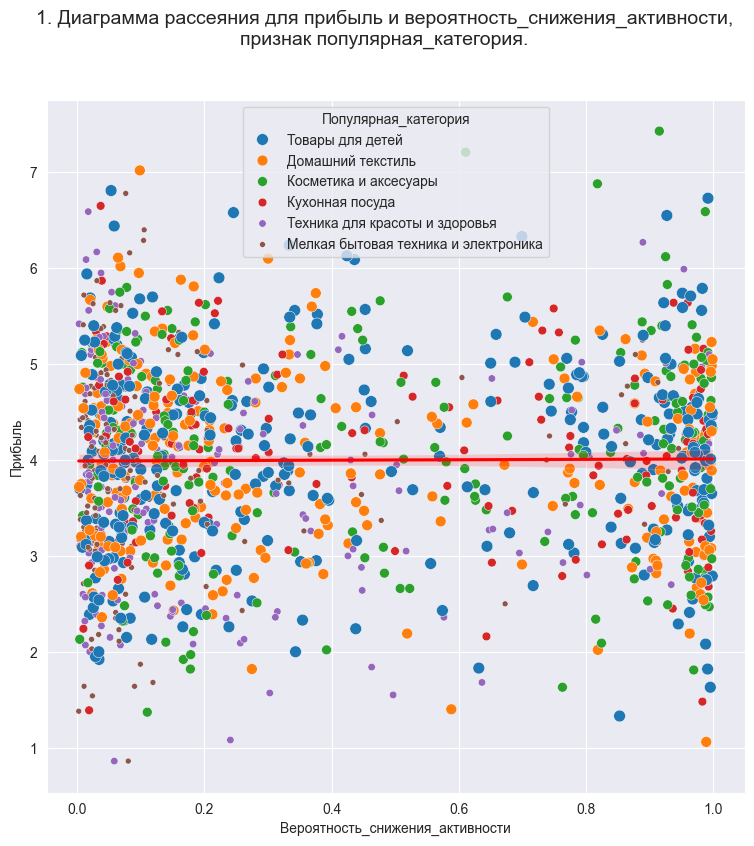

In [206]:
custom_scatter()

Построим графики для признаков 'Прибыль' и 'Вероятность_снижения_активности', с целью выбора порога для сегмента пользователей.

Статистика по столбцу 'Прибыль':


,count,mean,std,min,25%,50%,75%,max,median
Прибыль,"1,296.00",4.00,1.01,0.86,3.30,4.04,4.67,7.43,4.04


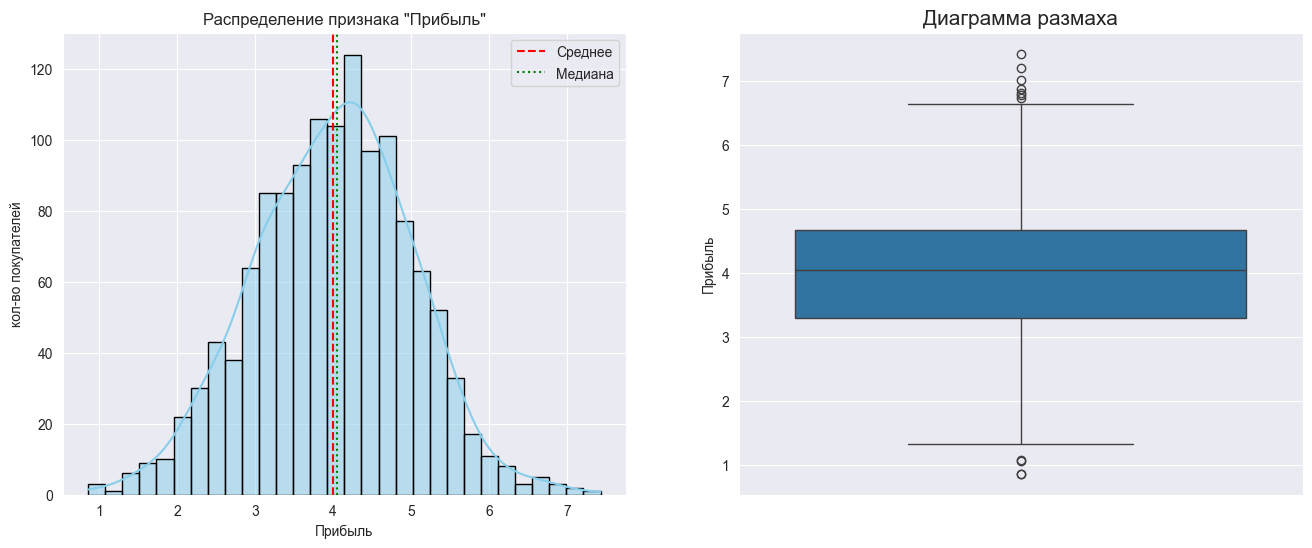

Статистика по столбцу 'Вероятность_снижения_активности':


,count,mean,std,min,25%,50%,75%,max,median
Вероятность_снижения_активности,"1,296.00",0.38,0.36,0.00,0.07,0.20,0.78,1.00,0.20


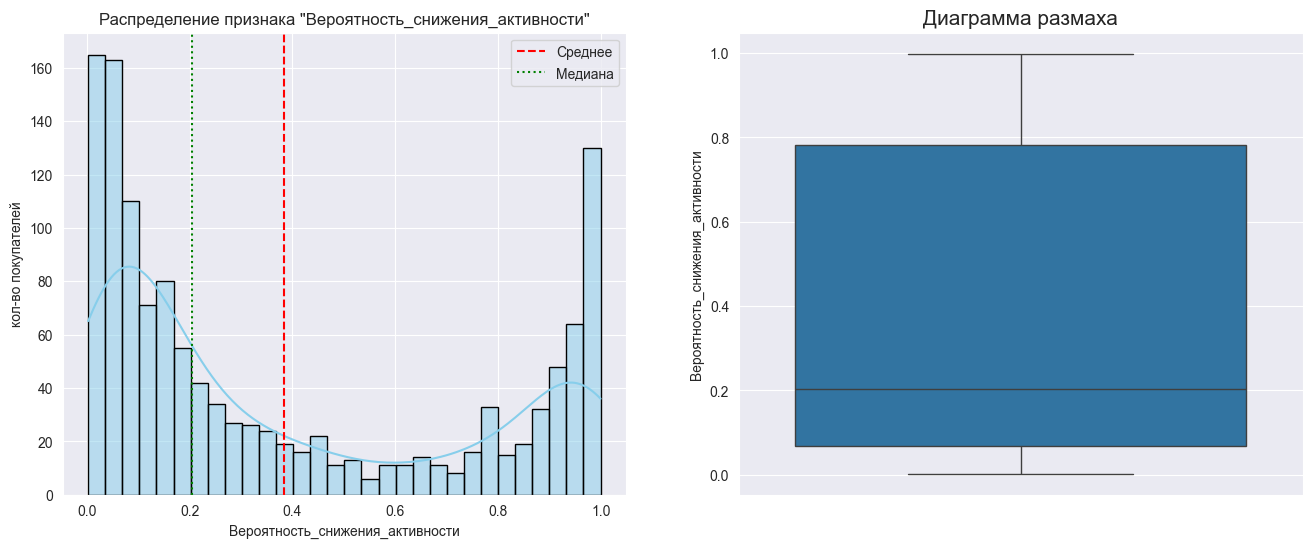

In [207]:
num_columns_excl = ['Акционные_покупки',
                    'Маркет_актив_6_мес',
                    'Выручка_предыдущий_месяц',
                    'Выручка_препредыдущий_месяц',
                    'Выручка_текущий_месяц',
                    'Минуты_предыдущий_месяц',
                    'Минуты_текущий_месяц']
custom_hist(df=market, del_columns=num_columns_excl)

Выберем сегмент клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

In [208]:
# Группа клиентов с высокой вероятностью снижения покупательской активности 
# и наиболее высокой прибыльностью.
result = market[(market['Прибыль'] > 5) & 
                (market['Вероятность_снижения_активности'] > 0.75)]

In [209]:
custom_info(result, sample=True)

,non_null_count,dtype
id,48,int64
Покупательская_активность,48,object
Тип_сервиса,48,object
Разрешить_сообщать,48,object
Маркет_актив_6_мес,48,float64
Маркет_актив_тек_мес,48,int64
Длительность,48,int64
Акционные_покупки,48,float64
Популярная_категория,48,object
Средний_просмотр_категорий_за_визит,48,int64


Количество записей: 48
Количество столбцов: 20


,158,1019,167,386,255,345,268,132,288,480
id,215510,216371,215519,215738,215607,215697,215620,215484,215640,215832
Покупательская_активность,Снизилась,Прежний уровень,Снизилась,Снизилась,Снизилась,Снизилась,Снизилась,Снизилась,Снизилась,Снизилась
Тип_сервиса,стандарт,стандарт,премиум,премиум,премиум,премиум,премиум,премиум,стандарт,стандарт
Разрешить_сообщать,да,нет,да,нет,да,да,да,нет,да,нет
Маркет_актив_6_мес,3.80,3.30,3.10,4.60,3.00,3.90,1.70,2.90,2.40,4.10
Маркет_актив_тек_мес,4,3,5,5,3,4,4,5,4,3
Длительность,324,414,824,187,862,935,704,448,251,206
Акционные_покупки,0.22,0.94,0.94,0.23,0.94,0.39,0.32,0.23,0.32,0.99
Популярная_категория,Техника для красоты и здоровья,Домашний текстиль,Товары для детей,Мелкая бытовая техника и электроника,Косметика и аксесуары,Техника для красоты и здоровья,Косметика и аксесуары,Товары для детей,Техника для красоты и здоровья,Товары для детей
Средний_просмотр_категорий_за_визит,2,2,2,1,1,3,1,4,2,4


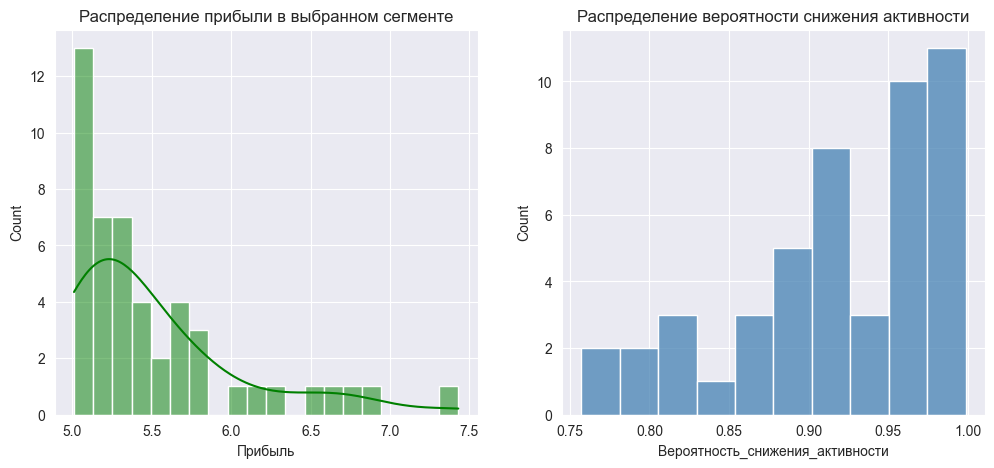

In [210]:
# Распределение прибыли и вероятности снижения активности
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(result['Прибыль'], bins=20, kde=True, color=COLOR_THREE)
plt.title('Распределение прибыли в выбранном сегменте')
plt.subplot(1, 2, 2)
sns.histplot(result['Вероятность_снижения_активности'], bins=10, color=COLOR_ONE)
plt.title('Распределение вероятности снижения активности')
plt.show()

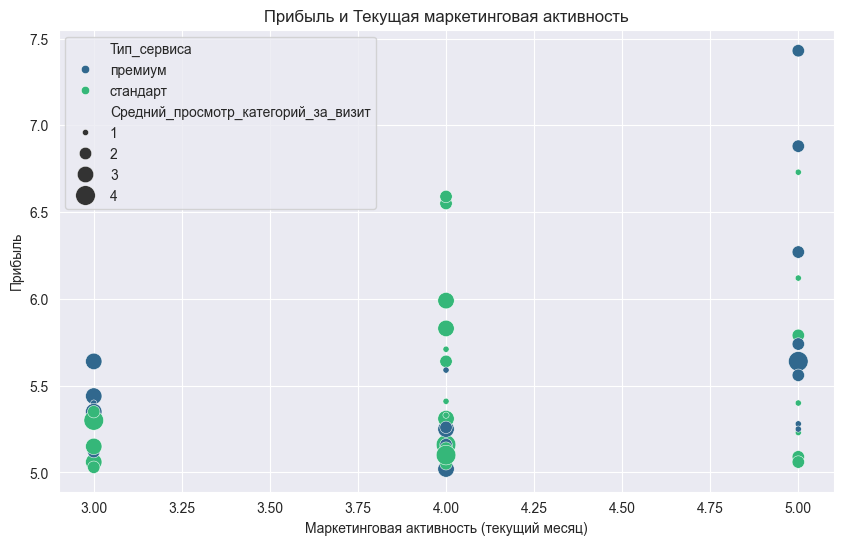

In [211]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=result,
    x='Маркет_актив_тек_мес',
    y='Прибыль',
    hue='Тип_сервиса',
    palette='viridis',
    size='Средний_просмотр_категорий_за_визит',
    sizes=(20, 200)
)
plt.title('Прибыль и Текущая маркетинговая активность')
plt.xlabel('Маркетинговая активность (текущий месяц)')
plt.ylabel('Прибыль')
plt.show()

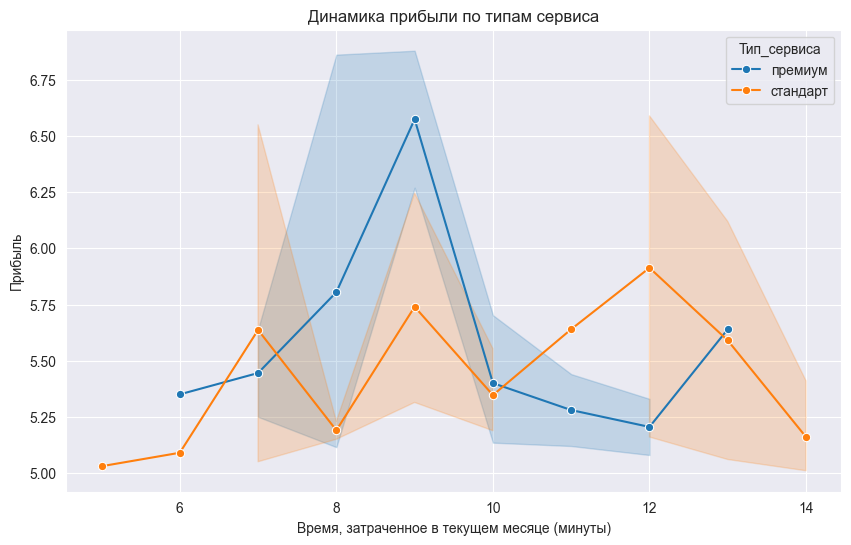

In [212]:
# Динамика прибыли по типам сервиса.
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=result,
    x='Минуты_текущий_месяц',
    y='Прибыль',
    hue='Тип_сервиса',
    marker='o'
)
plt.title('Динамика прибыли по типам сервиса')
plt.xlabel('Время, затраченное в текущем месяце (минуты)')
plt.ylabel('Прибыль')
plt.show()

In [213]:
def custom_count(data=result,
                 figsize=(10, 5),
                 x='Тип_сервиса',
                 hue='Популярная_категория'):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=x, palette='viridis', hue=hue)
    plt.title(f'Распределение по {x.lower()} в выбранном сегменте')
    plt.xlabel(x)
    plt.ylabel('Количество клиентов')
    plt.show()

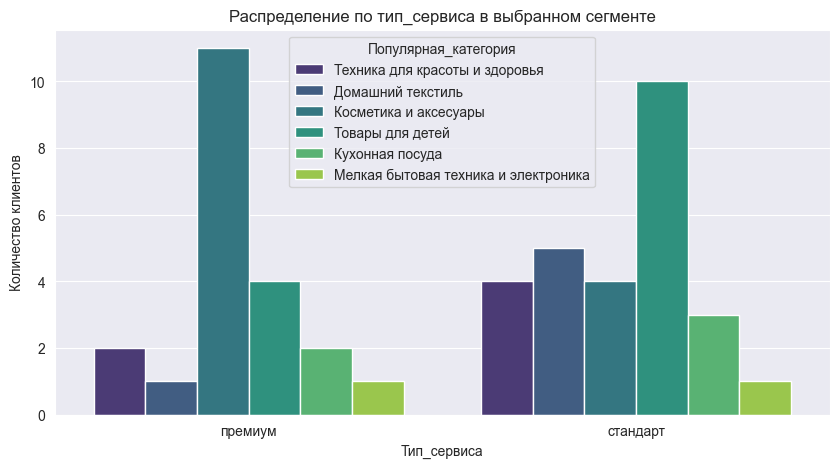

In [214]:
# Распределение по типам сервиса.
custom_count()

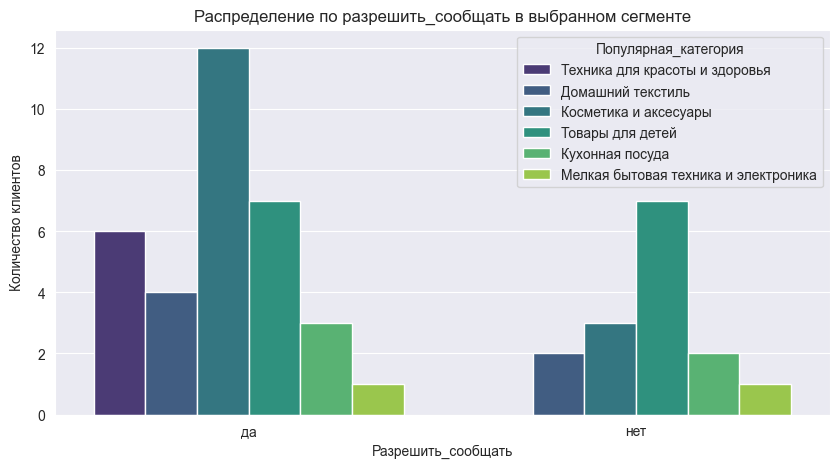

In [215]:
# Распределение о том, можно ли присылать покупателю дополнительные предложения о товаре.
custom_count(x='Разрешить_сообщать')

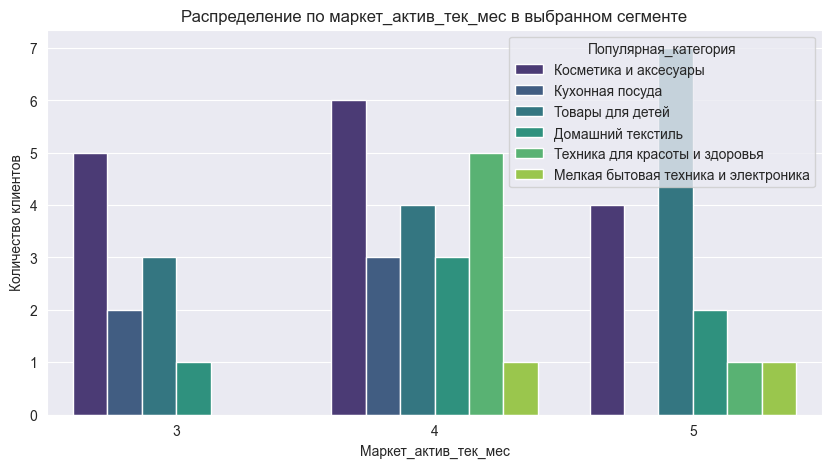

In [216]:
# Распределение по количеству маркетинговых коммуникаций в текущем месяце.
custom_count(x='Маркет_актив_тек_мес')

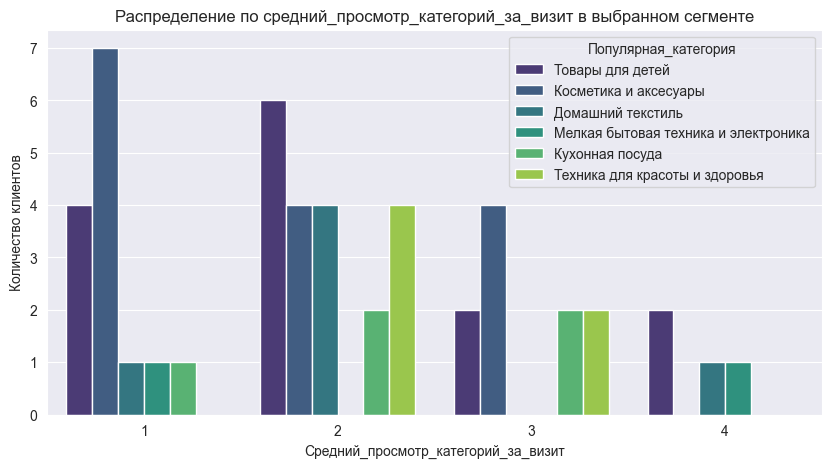

In [217]:
# Распределение по тому сколько в среднем категорий покупатель просмотрел
# за визит в течение последнего месяца.
custom_count(x='Средний_просмотр_категорий_за_визит')

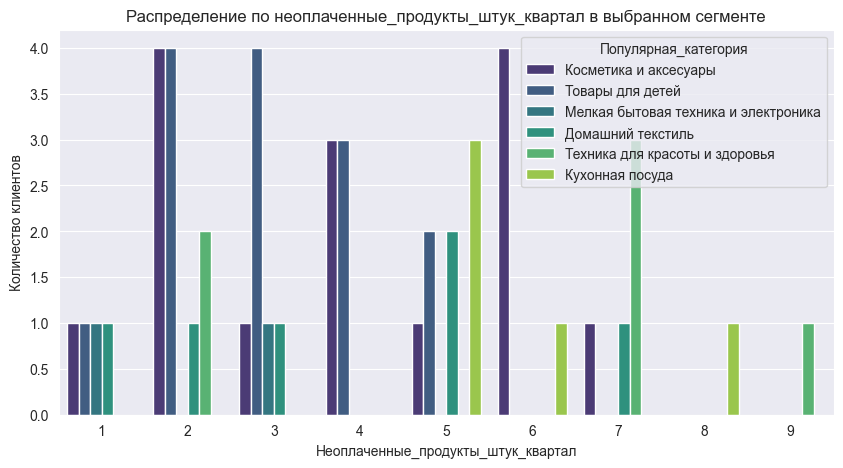

In [218]:
# Распределение по общему числу неоплаченных товаров в корзине за последние 3 месяца.
custom_count(x='Неоплаченные_продукты_штук_квартал')

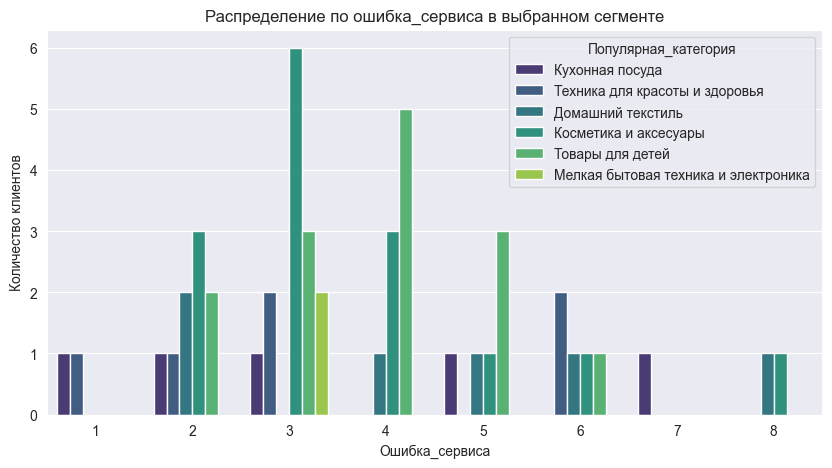

In [219]:
# Распределение по числу сбоев, которые коснулись покупателя
# во время посещения сайта.
custom_count(x='Ошибка_сервиса')

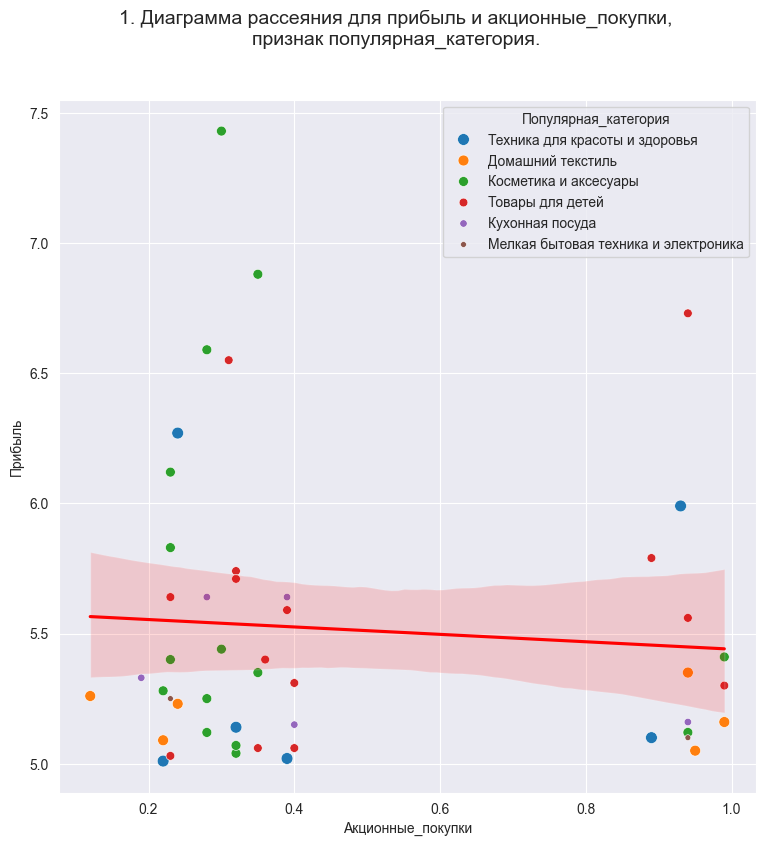

In [220]:
custom_scatter(data=result,
               x_value='Акционные_покупки',
               y_value='Прибыль')

**Вывод шаг №8**<br/>
По результату выполнения сегментации покупателей, делаем следующие выводы:
* В датафрейм market добавили два новых признака 'Прибыль' и 'Вероятность_снижения_активности'.
* По результату проведения графического исследования наблюдаем низкий 'Средний_просмотр_категорий_за_визит', присутствие 'Неоплаченные_продукты_штук_квартал', редкое участие в акциях, наличие ошибок сервиса.  В совокопности это влияет на параметр снижения покупательской активности.

## Общий вывод

Построили модель, которая предскажет вероятность снижения покупательской активности.

1. Загрузка данных.

   * Наборы данных далее датафреймы, описывают информацию о коммуникациях с покупателем и его продуктовом поведении; о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом; о времени (в минутах), которое покупатель провёл на сайте в течение периода и о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
   * В датафрейме market_file, market_money, market_time, money есть колонка id (уникальный идентификатор покупателя) по которому можно первый датафрейм обогатить . Если это потребуется в будущем.
   * Типы данных у каждого признака соответствуют корректным значениям. 
   * В датафреймах market_file, market_money, market_time, money отсутствуют пропущенные значения, количество ненулевых значений соотвествует количеству записей в датафреймах.
   * Названия колонок в датафреймах следует привести к единому формату, в соответствии со «змеиным_регистром».
   * При загрузке датафрейма money применен параметр **decimal=','**. Данный параметр помогает исправить процесс парсинга дробных чисел, pandas ожидает точку, а не запятую в качестве разделителя дробной части. В исходных данных была использована в качестве разделителя дробной части запятая вместо точки, было выявлено при исследовании первоначальной загрузки данных.

2. Предобработка данных.

   * Названия колонок в датафреймах приведены к единому формату, в соответствии со «змеиным_регистром».
   * В результате проверки выявлено отсутствие пропущенных значений в датафреймах market_file, market_money, market_time и money.
   * Явное дублирование данных в датафреймах отсутствует.
   * Выявлены и устранены неявные дубли в поле 'Тип_сервиса', значение 'стандартт' приведено к 'стандарт', датафрейма market_file.
   * В датафрейме market_time устранена орфографическая ошибка в поле 'Период', значение 'предыдцщий_месяц' приведено к 'предыдущий_месяц'.
   * Проверено отсутствие наличия дублей в числовом поле уникального идентификатора номера покупателя в датафреймах market_file, money. В датафреймах market_money и market_time дубли соотвествуют количеству значений в поле период для разных месяцев.

3. Исследовательский анализ данных.

   * Выявили и устранили выброс 106,862.20 в поле 'Выручка	', значение выброса превышало среднее значение в 21.3 раза.
   * Удалили троих пользователей с нулевой активностью.
   * Построили графики для непрерывных количественных значений датафреймов market_file, market_money и money, вывели гистограмму и диаграмму размаха. Практически все параметры распределены нормально, есть выбросы.
   * Построили графики для дискретных количественных значений датафреймов market_file и market_time, вывели гистограмму. Аномальных значений не выявили, практически все параметры распределены нормально.
   * Построили графики для категориальных значений датафреймов market_file, market_money и market_time, вывели столбчатую диаграмму. Аномалий не выявлено.
   * Отобрали клиентов с покупательской активностью не менее трёх месяцев. По результату отбора неактивные клиенты в выборке отсутствуют.

4. Объединение таблиц.
   * Выделили отдельные поля в датафреймах market_money и market_time для каждого периода.
   * Объединили датафреймы market_file с market_money и market_time по полю id. По результату получили итоговый датафрейм market.

5. Корреляционный анализ.

   * Мультиколлинеарности между входными признаками датафрейма market нет.
   * Интерпретировали полученные результаты коэффициента корреляции Пирсона с помощью шкалы Чеддока, исходя из уровня силы связи целевого признака Покупательская_активность с входными признаками.<br/>
   Признаки: Длительность - 0.1, Тип_сервиса - 0.13, Выручка_текущий_месяц - 0.20, Ошибка_сервиса - 0.22, Выручка_предыдущий_месяц - 0.22 практически не коррелируют с покупательской активностью.<br/>
   С покупательской активностью сильнее всего связаны признаки: Выручка_препредыдущий_месяц - 0.5, Акционные_покупки - 0.51, Неоплаченные_продукты_штук_квартал - 0.51, Маркет_актив_6_мес - 0.54, Средний_просмотр_категорий_за_визит - 0.54, Минуты_текущий_месяц - ~~0.58~~  , Минуты_предыдущий_месяц - 0.69, Страниц_за_визит - 0.75.
   * У признаков: Разрешить_сообщать, Маркет_актив_тек_мес наблюдаем отсутствие связи с целевым признаком.

6. Использование пайплайнов.

   * По результату использования одного общего пайплайна для всех моделей и инструмента подбора гиперпараметров, была выбрана лучшая модель LogisticRegression с параметрами C=4, penalty='l1', random_state=42, solver='liblinear'.
   * Метрика лучшей модели на кросс-валидации: 0.757
   * Метрика recall на тестовой выборке: 0.821
   * По результату проверки лучшей модели на адекватность, качество ее предсказаний оказалось лучше, чем константной модели DummyClassifier.

7. Анализ важности признаков.

   * Признаки 'Разрешить_сообщать_нет', 'Маркет_актив_тек_мес' и 'Тип_сервиса' мало значимы для модели;
   * Признаки 'Страниц_за_визит', 'Средний_просмотр_категорий_за_визит' и 'Минуты_предыдущий_месяц' сильнее всего влияют на целевой признак.

8. Сегментация покупателей.

   * В датафрейм market добавили два новых признака 'Прибыль' и 'Вероятность_снижения_активности'.
   * По результату проведения графического исследования наблюдаем низкий 'Средний_просмотр_категорий_за_визит', присутствие 'Неоплаченные_продукты_штук_квартал', редкое участие в акциях, наличие ошибок сервиса. В совокопности это влияет на параметр снижения покупательской активности.

9. Итоговый вывод.

   * Для удержания сегмента высокоприбыльных клиентов с риском снижения покупательской активности необходимы: персонализация, устранение технических сбоев и экслюзивные условия/предложения. Это не только снизит вероятность оттока, но и увеличит ценность клиента.
